### Chargement de donn√©es

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")





# Charger les donn√©es MovieLens
data_CLIENT_BNIOnline = pd.read_csv(
    r'C:\Users\gerard.kra\Documents\Doc_Stage\data_CLIENT_BNIOnline.csv',
    low_memory=False
)

data_Pret_clients_particuliers = pd.read_csv(
    r'C:\Users\gerard.kra\Documents\Doc_Stage\data_Pret_clients_particuliers.csv',
    low_memory=False
)

data_info_compte = pd.read_csv(
    r'C:\Users\gerard.kra\Documents\Doc_Stage\data_info_compte.csv',
    low_memory=False
)


data_carte_active = pd.read_csv(
    r'C:\Users\gerard.kra\Documents\Doc_Stage\data_carte_active.csv',
    low_memory=False
)

data_info_client = pd.read_csv(
    r'C:\Users\gerard.kra\Documents\Doc_Stage\data_info_client.csv',
    low_memory=False
) 

data_Libelle_RC=pd.read_excel("C:/Users/gerard.kra/Documents/Doc_Stage/Libelle_RC.xlsx")


In [2]:
#data_Pret_clients_particuliers.head()

In [3]:
#data_Pret_clients_particuliers.info()

In [2]:
import numpy as np

def transformer_code(val):
    if val in ['DIVERS', 'MONSIEUR', 'MADAME', 'MADEMOISELLE']:
        return val
    else:
        return 'DIVERS'

data_info_client['CIVILITE'] = data_info_client['CIVILITE'].apply(transformer_code)

### Analyse exploratoire

In [3]:
data_info_client.head()

NUM                                             CLIENT     DATNAIS  \
0  0.0  3467cefac8c44fadca43c666aabe898ad46a1fb3641d74...         NaN   
1  0.0  6e684dbaef09a3e49fea122d44f52434ed851a6acd59c9...  1953-01-01   
2  0.0  854cdb00fdcedf4fc6e06d489da8ae484bdee3ddc90087...  1956-07-30   
3  0.0  a8c3a3cfde4062d65c2689c53cfce7fbb24ab1ebde81c2...  1953-05-03   
4  0.0  97df78cbf0e27d45d8b753ecc604fc3f2dd654e201222f...  1956-01-01   

     DATE_EER   SEXE TITUPRINC  \
0  1998-03-04  FEMME       OUI   
1  2003-09-03  HOMME       OUI   
2  2003-06-27  FEMME       OUI   
3  2003-09-03  FEMME       OUI   
4  2003-09-08  HOMME       OUI   

                                                 IDP SITUATIONMATRIMONAL  \
0                                                NaN                 NaN   
1  164515614959de9fa3fde7e0ce19c5e0239a2a879bbb92...         CELIBATAIRE   
2  278fc0be61d5639e1f00ac6dde3c387565af98f36a4136...               MARIE   
3  a918171ceae7369ec00ac5d2e1e1436fdaab17f092b989...         CELIBATAIRE   
4  b03ee8c518577ca7621b34d15892cbc03a9c34270db2df...               MARIE   

   CODE_SECTEUR_ACTIVITE                  SECTEUR_ACTIVITE_PAR_CODEAPE  ...  \
0                 9915.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
1                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
2                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
3                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
4                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   

                PROFESSION CODE_AGENT_ECO LIBELLE_AGENT_ECO      CIVILITE  \
0                      NaN            PAR      PARTICULIERS        DIVERS   
1        EMPLOYE DE BANQUE            PAR      PARTICULIERS      MONSIEUR   
2        EMPLOYE DE BANQUE            PAR      PARTICULIERS        MADAME   
3  SECRETAIRE DE DIRECTION            PAR      PARTICULIERS  MADEMOISELLE   
4                   AUTRES            PAR      PARTICULIERS      MONSIEUR   

     AGE  ANCIENNETE_JOURS  CARTE  PRET  BNIONLINE  COMPTE  
0    NaN             10012      0     0          0       1  
1  72.58              8003      0     0          0       1  
2  69.08              8071      1     0          0       1  
3  72.25              8003      1     0          0       1  
4  69.58              7998      1     1          0       1  

[5 rows x 21 columns]

In [4]:
data_info_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339090 entries, 0 to 339089
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   NUM                           333583 non-null  float64
 1   CLIENT                        339090 non-null  object 
 2   DATNAIS                       329958 non-null  object 
 3   DATE_EER                      339090 non-null  object 
 4   SEXE                          339090 non-null  object 
 5   TITUPRINC                     339090 non-null  object 
 6   IDP                           333480 non-null  object 
 7   SITUATIONMATRIMONAL           328009 non-null  object 
 8   CODE_SECTEUR_ACTIVITE         339090 non-null  float64
 9   SECTEUR_ACTIVITE_PAR_CODEAPE  334046 non-null  object 
 10  SEGMENT                       184249 non-null  object 
 11  PROFESSION                    224293 non-null  object 
 12  CODE_AGENT_ECO                339090 non-nul

In [5]:
pourcentage_nan = data_info_client.isna().mean() * 100
print(pourcentage_nan)

NUM                              1.624053
CLIENT                           0.000000
DATNAIS                          2.693090
DATE_EER                         0.000000
SEXE                             0.000000
TITUPRINC                        0.000000
IDP                              1.654428
SITUATIONMATRIMONAL              3.267864
CODE_SECTEUR_ACTIVITE            0.000000
SECTEUR_ACTIVITE_PAR_CODEAPE     1.487511
SEGMENT                         45.663688
PROFESSION                      33.854434
CODE_AGENT_ECO                   0.000000
LIBELLE_AGENT_ECO                0.000000
CIVILITE                         0.000000
AGE                              2.693090
ANCIENNETE_JOURS                 0.000000
CARTE                            0.000000
PRET                             0.000000
BNIONLINE                        0.000000
COMPTE                           0.000000
dtype: float64


In [6]:
print(data_info_client.shape)

(339090, 21)


### Prise en compte du type de pret et du type de carte

In [7]:
# Regrouper les types de carte par client
types_cartes = data_carte_active.groupby('CLIENT')['CPR_LABE'].apply(lambda x: '__'.join(x.unique())).reset_index()
types_cartes.rename(columns={'CPR_LABE': 'TYPE_CARTE'}, inplace=True)

# Fusionner avec data_info_client
data_info_client = data_info_client.merge(types_cartes, on='CLIENT', how='left')

# Cr√©er la colonne CARTE (1 si TYPE_CARTE existe, sinon 0)
data_info_client['CARTE'] = data_info_client['TYPE_CARTE'].notna().astype(int)


In [8]:
# Regrouper les types de pr√™t par client
types_prets = data_Pret_clients_particuliers.groupby('CLIENT')['LIBELLE_NCG'].apply(lambda x: '__'.join(x.unique())).reset_index()

# Fusionner avec data_info_client
data_info_client = data_info_client.merge(types_prets, on='CLIENT', how='left')

# Cr√©er la colonne PRET (1 si TYPE_PRET existe, sinon 0)
data_info_client['PRET'] = data_info_client['LIBELLE_NCG'].notna().astype(int)


In [9]:
data_info_client.head()

NUM                                             CLIENT     DATNAIS  \
0  0.0  3467cefac8c44fadca43c666aabe898ad46a1fb3641d74...         NaN   
1  0.0  6e684dbaef09a3e49fea122d44f52434ed851a6acd59c9...  1953-01-01   
2  0.0  854cdb00fdcedf4fc6e06d489da8ae484bdee3ddc90087...  1956-07-30   
3  0.0  a8c3a3cfde4062d65c2689c53cfce7fbb24ab1ebde81c2...  1953-05-03   
4  0.0  97df78cbf0e27d45d8b753ecc604fc3f2dd654e201222f...  1956-01-01   

     DATE_EER   SEXE TITUPRINC  \
0  1998-03-04  FEMME       OUI   
1  2003-09-03  HOMME       OUI   
2  2003-06-27  FEMME       OUI   
3  2003-09-03  FEMME       OUI   
4  2003-09-08  HOMME       OUI   

                                                 IDP SITUATIONMATRIMONAL  \
0                                                NaN                 NaN   
1  164515614959de9fa3fde7e0ce19c5e0239a2a879bbb92...         CELIBATAIRE   
2  278fc0be61d5639e1f00ac6dde3c387565af98f36a4136...               MARIE   
3  a918171ceae7369ec00ac5d2e1e1436fdaab17f092b989...         CELIBATAIRE   
4  b03ee8c518577ca7621b34d15892cbc03a9c34270db2df...               MARIE   

   CODE_SECTEUR_ACTIVITE                  SECTEUR_ACTIVITE_PAR_CODEAPE  ...  \
0                 9915.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
1                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
2                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
3                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
4                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   

  LIBELLE_AGENT_ECO      CIVILITE    AGE ANCIENNETE_JOURS CARTE  PRET  \
0      PARTICULIERS        DIVERS    NaN            10012     0     0   
1      PARTICULIERS      MONSIEUR  72.58             8003     0     0   
2      PARTICULIERS        MADAME  69.08             8071     1     0   
3      PARTICULIERS  MADEMOISELLE  72.25             8003     1     0   
4      PARTICULIERS      MONSIEUR  69.58             7998     1     1   

   BNIONLINE  COMPTE                                         TYPE_CARTE  \
0          0       1                                                NaN   
1          0       1                                                NaN   
2          0       1  VISA ELECTRON PLUS PERSONNEL BNI__EBURNIE BRON...   
3          0       1                     Visa CLASSIC Primo Non Package   
4          0       1      VISA ELECTRON__Visa CLASSIC Primo Non Package   

         LIBELLE_NCG  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4  CRD CT CONSO. PAR  

[5 rows x 23 columns]

In [10]:
data_info_client = data_info_client.rename(columns={'LIBELLE_NCG': 'TYPE_PRET'})

In [11]:
data_info_client.head()

NUM                                             CLIENT     DATNAIS  \
0  0.0  3467cefac8c44fadca43c666aabe898ad46a1fb3641d74...         NaN   
1  0.0  6e684dbaef09a3e49fea122d44f52434ed851a6acd59c9...  1953-01-01   
2  0.0  854cdb00fdcedf4fc6e06d489da8ae484bdee3ddc90087...  1956-07-30   
3  0.0  a8c3a3cfde4062d65c2689c53cfce7fbb24ab1ebde81c2...  1953-05-03   
4  0.0  97df78cbf0e27d45d8b753ecc604fc3f2dd654e201222f...  1956-01-01   

     DATE_EER   SEXE TITUPRINC  \
0  1998-03-04  FEMME       OUI   
1  2003-09-03  HOMME       OUI   
2  2003-06-27  FEMME       OUI   
3  2003-09-03  FEMME       OUI   
4  2003-09-08  HOMME       OUI   

                                                 IDP SITUATIONMATRIMONAL  \
0                                                NaN                 NaN   
1  164515614959de9fa3fde7e0ce19c5e0239a2a879bbb92...         CELIBATAIRE   
2  278fc0be61d5639e1f00ac6dde3c387565af98f36a4136...               MARIE   
3  a918171ceae7369ec00ac5d2e1e1436fdaab17f092b989...         CELIBATAIRE   
4  b03ee8c518577ca7621b34d15892cbc03a9c34270db2df...               MARIE   

   CODE_SECTEUR_ACTIVITE                  SECTEUR_ACTIVITE_PAR_CODEAPE  ...  \
0                 9915.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
1                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
2                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
3                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
4                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   

  LIBELLE_AGENT_ECO      CIVILITE    AGE ANCIENNETE_JOURS CARTE  PRET  \
0      PARTICULIERS        DIVERS    NaN            10012     0     0   
1      PARTICULIERS      MONSIEUR  72.58             8003     0     0   
2      PARTICULIERS        MADAME  69.08             8071     1     0   
3      PARTICULIERS  MADEMOISELLE  72.25             8003     1     0   
4      PARTICULIERS      MONSIEUR  69.58             7998     1     1   

   BNIONLINE  COMPTE                                         TYPE_CARTE  \
0          0       1                                                NaN   
1          0       1                                                NaN   
2          0       1  VISA ELECTRON PLUS PERSONNEL BNI__EBURNIE BRON...   
3          0       1                     Visa CLASSIC Primo Non Package   
4          0       1      VISA ELECTRON__Visa CLASSIC Primo Non Package   

           TYPE_PRET  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4  CRD CT CONSO. PAR  

[5 rows x 23 columns]

In [12]:
data_info_client.columns

Index(['NUM', 'CLIENT', 'DATNAIS', 'DATE_EER', 'SEXE', 'TITUPRINC', 'IDP',
       'SITUATIONMATRIMONAL', 'CODE_SECTEUR_ACTIVITE',
       'SECTEUR_ACTIVITE_PAR_CODEAPE', 'SEGMENT', 'PROFESSION',
       'CODE_AGENT_ECO', 'LIBELLE_AGENT_ECO', 'CIVILITE', 'AGE',
       'ANCIENNETE_JOURS', 'CARTE', 'PRET', 'BNIONLINE', 'COMPTE',
       'TYPE_CARTE', 'TYPE_PRET'],
      dtype='object')

In [13]:
data_info_client.sample(10)

NUM                                             CLIENT     DATNAIS  \
237938  0.0  e16e8c5708849e135d10acbe4d9526adebee51c8b3f5af...  1968-07-02   
208281  0.0  ae9462de1ae4f393cb17a36f09b415fd68abc3db9ac986...  1981-02-03   
314694  0.0  40002de43a903d1494e041b264c409b339858ba72a54d9...  1987-06-05   
32677   0.0  ba18366ae81e315969deb48347f6cf4258a5ecc66c825a...  1960-01-01   
78199   0.0  38390be8e9fbfd9eb6d712bf27457d386216e42a288108...  1964-06-21   
314346  0.0  8cf28eaca6e319cc586a412057a273488d661794a30fd0...  1984-05-17   
338297  0.0  2c0251e3b7c3fcc65cd65028b3a35db14fa46ea8024d8c...  1982-04-24   
321357  0.0  c8ba0f9cc84196b6d40f0bbed604fabc63a142087e6ebf...  2005-04-08   
195157  NaN  55c15c0020dc98a234a2b233cebad8cababe0477d9c03e...         NaN   
296051  0.0  1705bdf9ad51960aafeafc85d10973e03ff02b1db22613...  1991-04-16   

          DATE_EER   SEXE TITUPRINC  \
237938  2021-11-22  FEMME       OUI   
208281  2020-06-25  HOMME       OUI   
314694  2024-10-14  FEMME       OUI   
32677   2011-01-03  HOMME       OUI   
78199   2013-01-21  HOMME       OUI   
314346  2024-10-08  HOMME       OUI   
338297  2025-07-15  HOMME       OUI   
321357  2025-01-03  HOMME       OUI   
195157  2019-10-11  FEMME       NON   
296051  2024-01-24  HOMME       OUI   

                                                      IDP SITUATIONMATRIMONAL  \
237938  ab1b7f13a17e8dfcb9b08984ec1e5510ce64626979578b...               MARIE   
208281  ba681ad73dd312b9e75ec485800e70d7431113526ad9e9...         CELIBATAIRE   
314694  47a9e9030f1dc367b38fba45e5122e897eeb99c44a1958...         CELIBATAIRE   
32677   779aa57dbb795877b65304a2142a2df29144b344255074...         CONCUBINAGE   
78199   836744d2ab1a033379cb4703b94a1e0606f46ee12a7739...               MARIE   
314346  15c9f456c20733ef2ead9972c3453debd3a07e0d5bfbd0...         CELIBATAIRE   
338297  038b01d368d6ac110b96431fd662376b203724b24d7a93...               MARIE   
321357  43707e4f70a0c78c83d4842880152fd2586600b5b8f094...         CELIBATAIRE   
195157                                                NaN                 NaN   
296051  0a93ea0bc4f1e197e2eb3ae64c50229f09cbec40681538...         CELIBATAIRE   

        CODE_SECTEUR_ACTIVITE                  SECTEUR_ACTIVITE_PAR_CODEAPE  \
237938                 9927.0  Agriculture, √©levage, for√™t, chasse et p√™che   
208281                 9331.0  Agriculture, √©levage, for√™t, chasse et p√™che   
314694                 9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   
32677                  9963.0  Agriculture, √©levage, for√™t, chasse et p√™che   
78199                  9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   
314346                 9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   
338297                 9912.0  Agriculture, √©levage, for√™t, chasse et p√™che   
321357                 9998.0  Agriculture, √©levage, for√™t, chasse et p√™che   
195157                 9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   
296051                 9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   

        ... LIBELLE_AGENT_ECO      CIVILITE    AGE ANCIENNETE_JOURS CARTE  \
237938  ...      PARTICULIERS        MADAME  57.08             1348     0   
208281  ...      PARTICULIERS      MONSIEUR  44.50             1863     1   
314694  ...      PARTICULIERS  MADEMOISELLE  38.17              291     1   
32677   ...      PARTICULIERS      MONSIEUR  65.58             5324     0   
78199   ...      PARTICULIERS      MONSIEUR  61.17             4575     0   
314346  ...      PARTICULIERS      MONSIEUR  41.25              297     0   
338297  ...      PARTICULIERS      MONSIEUR  43.33               17     0   
321357  ...      PARTICULIERS      MONSIEUR  20.33              210     0   
195157  ...      PARTICULIERS        DIVERS    NaN             2121     1   
296051  ...      PARTICULIERS      MONSIEUR  34.33              555     1   

        PRET  BNIONLINE  COMPTE                      TYPE_CARTE  TYPE_PRET  
23

In [14]:
data_info_client = data_info_client.rename(columns={'CPR_LABE': 'TYPE_CARTE'})
data_info_client = data_info_client.rename(columns={'LIBELLE_NCG': 'TYPE_PRET'})

In [15]:
data_info_client.sample(10)

NUM                                             CLIENT     DATNAIS  \
232241  0.0  5bb77d4de6477ac8e7efe0775d988df225bd3b9fd0eaa1...  1996-08-12   
189920  0.0  65cc25403fc566722d9fd1728bd262a9eee08aa585ab9f...  1989-12-01   
246670  0.0  65d3e78f82a6680cdf568517c65a73ab919793d56b9791...  1988-12-29   
80402   0.0  aa780ba0971fd5b9f852590fc026f6f7caf007cd559682...  1986-01-26   
242298  0.0  a31814e42a75d868a30b79c39fe18f226cf05f859e611f...  1984-01-01   
201236  0.0  333af6e7a997f1ff5ad454090d8d01f7f7f25c01d0dd02...  2015-11-13   
187221  0.0  ca39a287fb68128880613be5e1a8bbe2289d44fb43f0d3...  2013-03-12   
19524   0.0  8e2bbea35424ae449096f16fb990465867cba268733be6...  1971-04-12   
240771  0.0  cc04a7b481e321aeb268303ac6941463c9b977d4cdb17f...  1954-01-01   
38112   0.0  e81464a226837d76277e39a3a69650addf78a56ed5dd9e...         NaN   

          DATE_EER   SEXE TITUPRINC  \
232241  2021-09-02  HOMME       OUI   
189920  2019-06-18  HOMME       OUI   
246670  2022-03-23  FEMME       OUI   
80402   2013-03-01  HOMME       OUI   
242298  2022-01-26  HOMME       OUI   
201236  2020-01-15  FEMME       OUI   
187221  2019-04-23  FEMME       OUI   
19524   2010-01-26  HOMME       OUI   
240771  2022-01-05  HOMME       OUI   
38112   2011-02-21  HOMME       OUI   

                                                      IDP SITUATIONMATRIMONAL  \
232241  fb937565fff86c59b32ea1b6ceb6688ea7a9d80600b266...         CELIBATAIRE   
189920  9d9766e5c515e004756ddc987d586181ab0ce905fa3804...         CELIBATAIRE   
246670  d1bd7b59c84680f3ee85f4cf1457f6640deb20e63c3d1c...         CELIBATAIRE   
80402   7a0a4d8652e8273336fc1126a5e82ee4e644b4c932c960...         CELIBATAIRE   
242298  87a9bb5b3737e9fc2dbfeda731ab0f2fa46e45db083835...         CELIBATAIRE   
201236  5cd077ae67a81974662201bb8ea69d185918250e193b0a...         CELIBATAIRE   
187221  f2932e0460e258cba73707e7942d7feab115c46e3aab7e...         CELIBATAIRE   
19524   15238256b527ae02a60d9bf2406be25981bc42149b0a06...         CELIBATAIRE   
240771  82d097d043cbf04b84265fc9add6cab96388951af7c9a2...               MARIE   
38112   645f9f45c8a7cec45d71fa8ca22abd3391540e6ce10642...                 NaN   

        CODE_SECTEUR_ACTIVITE                  SECTEUR_ACTIVITE_PAR_CODEAPE  \
232241                 9818.0  Agriculture, √©levage, for√™t, chasse et p√™che   
189920                 9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   
246670                 9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   
80402                  9933.0  Agriculture, √©levage, for√™t, chasse et p√™che   
242298                 9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   
201236                 9992.0  Agriculture, √©levage, for√™t, chasse et p√™che   
187221                 9814.0  Agriculture, √©levage, for√™t, chasse et p√™che   
19524                  9912.0  Agriculture, √©levage, for√™t, chasse et p√™che   
240771                 9982.0  Agriculture, √©levage, for√™t, chasse et p√™che   
38112                  9913.0  Agriculture, √©levage, for√™t, chasse et p√™che   

        ... LIBELLE_AGENT_ECO      CIVILITE    AGE ANCIENNETE_JOURS CARTE  \
232241  ...      PARTICULIERS      MONSIEUR  29.00             1429     0   
189920  ...      PARTICULIERS      MONSIEUR  35.67             2236     1   
246670  ...      PARTICULIERS  MADEMOISELLE  36.67             1227     1   
80402   ...      PARTICULIERS      MONSIEUR  39.58             4536     0   
242298  ...      PARTICULIERS      MONSIEUR  41.58             1283     0   
201236  ...      PARTICULIERS  MADEMOISELLE   9.75             2025     0   
187221  ...      PARTICULIERS  MADEMOISELLE  12.42             2292     0   
19524   ...      PARTICULIERS      MONSIEUR  54.33             5666     1   
240771  ...      PARTICULIERS      MONSIEUR  71.58             1304     1   
38112   ...      PARTICULIERS        DIVERS    NaN             5275     0   

        PRET  BNIONLINE  COMPTE                      TYPE_CARTE  \
232241     0

### Prise en compte du type de compte et du type de produit bnionline

In [16]:
comptes_bni_online = set(data_CLIENT_BNIOnline['Compte_Bancaire'])
clients_avec_compte = data_info_compte[data_info_compte['COMPTE'].isin(comptes_bni_online)]['CLIENT'].unique()

data_info_client['BNIONLINE'] = data_info_client['CLIENT'].isin(clients_avec_compte).astype(int)
data_info_client['COMPTE'] = data_info_client['CLIENT'].isin(data_info_compte['CLIENT']).astype(int)

# Associer chaque client √† son type BNIOnline via les comptes
data_bni_type = data_info_compte.merge(
    data_CLIENT_BNIOnline[['Compte_Bancaire', 'intitule_compte']],
    left_on='COMPTE',
    right_on='Compte_Bancaire',
    how='left'
)

# Regrouper les types par client
types_bnionline = data_bni_type.groupby('CLIENT')['intitule_compte'].apply(
    lambda x: '__'.join(x.dropna().unique())
).reset_index().rename(columns={'intitule_compte': 'TYPE_BNIONLINE'})

# Fusionner avec data_info_client
data_info_client = data_info_client.merge(types_bnionline, on='CLIENT', how='left')


types_compte = data_info_compte.groupby('CLIENT')['LIBELLE_RC'].apply(
    lambda x: '__'.join(x.dropna().unique())
).reset_index().rename(columns={'LIBELLE_RC': 'TYPE_COMPTE'})

data_info_client = data_info_client.merge(types_compte, on='CLIENT', how='left')


In [17]:
data_info_client.sample(10)

NUM                                             CLIENT     DATNAIS  \
327473  0.0  ab827f877e78a9d2890f67127fbc8e5f97896a2b578fef...  1982-05-27   
16835   0.0  bab3f4003b9dfd929e59339ff35e4373f44cddfd544da1...  1962-12-28   
179345  0.0  ee30d98d6f375d9d05fa163939a726a28fe8e40feb3a51...  1969-01-12   
230539  0.0  0ed089387fb1d365b3410fa43b470c5bfe91b427ca4291...  2009-09-01   
74618   0.0  3c89d848abdb3aeec79fd39903bdaa0215a8d6e72626c4...  1976-08-25   
316732  0.0  9948bb239ed5ddd23723986129d5f78eb5a4acefeb6073...  1994-05-14   
280305  0.0  46f97d171edaf650c816b5e4df76352f63f303b4081804...  2002-12-21   
264028  0.0  586b63d81522714fbe5de5d5a1a3e71b37e38920da8d36...  1981-04-22   
71100   0.0  cf9e37886def7d76f3f2a19859b0d34b1e1b081b810e7d...  1976-01-01   
136457  0.0  ee859ec973e63dd61b6a115104c29614f2b0af383eb3dc...  1984-04-08   

          DATE_EER   SEXE TITUPRINC  \
327473  2025-03-17  HOMME       OUI   
16835   2009-11-09  HOMME       OUI   
179345  2018-10-26  HOMME       OUI   
230539  2021-08-05  FEMME       OUI   
74618   2012-11-16  HOMME       OUI   
316732  2024-11-04  FEMME       OUI   
280305  2023-06-08  HOMME       OUI   
264028  2022-11-17  HOMME       OUI   
71100   2012-10-01  HOMME       OUI   
136457  2016-01-26  HOMME       OUI   

                                                      IDP SITUATIONMATRIMONAL  \
327473  e6e21e120c29fc0461e2fb5f834183a541762131d8eb82...         CELIBATAIRE   
16835   370b6db397969fde5fc9ef1ef572c210cadb21cc372b44...         CELIBATAIRE   
179345  4dea38b1b1137b92b1eb547c4620ebca5afadaaa5ca5c6...               MARIE   
230539  be781ec8c080913267ef6de1e8745e91ce7fde193580ba...         CELIBATAIRE   
74618   f6fcbe683eac3980a51638c1b593c1ee2e2eec973732cd...         CELIBATAIRE   
316732  eb3e63b79526e10b67d52eb082aa1ea24b381970e5fa5c...         CELIBATAIRE   
280305  05e9f67b8adb6121f016d6a194861fe85e0adbc10c8bdd...         CELIBATAIRE   
264028  88956b7fc1e5e1f95de1282ac05ffb155ebe931d747666...         CELIBATAIRE   
71100   41a718b6d6b29bd611648dc7a645f55373641a326c560a...         CELIBATAIRE   
136457  3d99f558f7ef78d3e0ac292b3feb74db7201ea650760cb...         CELIBATAIRE   

        CODE_SECTEUR_ACTIVITE                  SECTEUR_ACTIVITE_PAR_CODEAPE  \
327473                 9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   
16835                  9913.0  Agriculture, √©levage, for√™t, chasse et p√™che   
179345                 9959.0  Agriculture, √©levage, for√™t, chasse et p√™che   
230539                 9998.0  Agriculture, √©levage, for√™t, chasse et p√™che   
74618                  9912.0  Agriculture, √©levage, for√™t, chasse et p√™che   
316732                 9965.0  Agriculture, √©levage, for√™t, chasse et p√™che   
280305                 9999.0  Agriculture, √©levage, for√™t, chasse et p√™che   
264028                 9965.0  Agriculture, √©levage, for√™t, chasse et p√™che   
71100                  9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   
136457                 9931.0  Agriculture, √©levage, for√™t, chasse et p√™che   

        ...    AGE ANCIENNETE_JOURS CARTE PRET BNIONLINE  COMPTE  \
327473  ...  43.25              137     0    0         0       1   
16835   ...  62.67             5744     0    0         0       0   
179345  ...  56.58             2471     1    0         0       1   
230539  ...  15.92             1457     0    0         0       1   
74618   ...  49.00             4641     1    1         0       1   
316732  ...  31.25              270     1    0         0       1   
280305  ...  22.67              785     0    0         1       1   
264028  ...  44.33              988     0    0         0       1   
71100   ...  49.58             4687     0    0         0       1   
136457  ...  41.33             3475     0    0         0       0   

                            TYPE_CARTE  \
327473                             NaN   
16835                              NaN   
179345      Visa CLASSIC Primo Package   
230539    

In [18]:
data_info_client = data_info_client.rename(columns={'TYPE_BNIONLINE': 'TYPE_PROD_Bnionline'})

In [19]:
data_info_client.columns

Index(['NUM', 'CLIENT', 'DATNAIS', 'DATE_EER', 'SEXE', 'TITUPRINC', 'IDP',
       'SITUATIONMATRIMONAL', 'CODE_SECTEUR_ACTIVITE',
       'SECTEUR_ACTIVITE_PAR_CODEAPE', 'SEGMENT', 'PROFESSION',
       'CODE_AGENT_ECO', 'LIBELLE_AGENT_ECO', 'CIVILITE', 'AGE',
       'ANCIENNETE_JOURS', 'CARTE', 'PRET', 'BNIONLINE', 'COMPTE',
       'TYPE_CARTE', 'TYPE_PRET', 'TYPE_PROD_Bnionline', 'TYPE_COMPTE'],
      dtype='object')

In [20]:
print(data_info_client.shape)

(339090, 25)


#### Identifier les lignes de la colonne SEGMENT qui contiennent des valeurs manquantes

In [21]:
data_info_client[data_info_client['SEGMENT'].isnull()].sample(20)
#print(data_info_client[data_info_client['SEGMENT'].isnull()].shape)

NUM                                             CLIENT     DATNAIS  \
9106    0.0  ba032f95b407965ed2471506e947334efd7d962c3f76b4...  1973-07-25   
123279  0.0  a685c3878dc58c75e0fe62cb324f23c731359e24a9ad0a...  1986-08-18   
100689  0.0  3447c03d2d4d11585399701e877f5a3ec762903728d231...  1985-02-01   
115430  0.0  84319e6f49e191d82049db3dd01cf46732c3a7f5b1f2ac...  1978-03-27   
247888  0.0  8bba0d55add5537c1c81f588fa2c2669ff43aff8046cce...  1986-08-17   
20276   0.0  5389fee02ba1e0e1ce07b04c3654e3a16e23f2109da870...  1975-02-03   
244037  0.0  e5d6d646b1ef3e3bfbd2d9837786897a9d6f9c97048c92...  1998-06-11   
229617  0.0  8e02c7f315944bdfd63cbe351c2cacfa0c7cff57bb2856...  1994-11-13   
79085   0.0  479bff62343fdab3f15ffb6b5d1d8afb9cd92080d7eacb...  1976-04-23   
75081   0.0  826af68e02cfad6cf94df6f8f108dffc4e4c75092d551f...  1985-02-10   
78398   0.0  33904f5a0078cd1ebf13de3c2624586b9580ed0b0cd139...  1979-03-17   
187512  0.0  6664e45415b782868f0d9338d65c64066432a694bb9d3e...  1973-01-01   
258280  0.0  7271bae4240c2283e16f03805118850640444d788705ff...  1994-04-22   
9216    0.0  8832d93529faa2e79290d3c6c5cf46e8c74c886012e6a8...  1982-01-29   
78119   0.0  3e3211dd2c368a9038c6d9e60a1c253b8b439ddbdbfc92...  1990-01-05   
224695  0.0  618c7050c7af8393d168a31f0d204a08b3a6c2a24a422f...  1957-02-02   
185513  0.0  83c0e334feaf6afd48500d5a15d28060929e3caa9acffb...  1987-02-05   
95256   0.0  73ebf1821976d0c181096abc6e2f91183266ae0831c030...  1966-05-02   
321802  0.0  b57d47151bf0e4cf23c9eeda26cc667918c2c39d62bc77...  1990-11-16   
184322  0.0  ceabdd2322298f9d4d025b6b6c451e22ba4b1e77f0b173...  1987-05-26   

          DATE_EER   SEXE TITUPRINC  \
9106    2008-12-12  HOMME       OUI   
123279  2015-04-07  FEMME       OUI   
100689  2013-12-27  FEMME       OUI   
115430  2014-10-24  HOMME       OUI   
247888  2022-04-11  FEMME       OUI   
20276   2010-02-11  HOMME       OUI   
244037  2022-02-21  HOMME       OUI   
229617  2021-07-19  HOMME       OUI   
79085   2013-02-08  HOMME       OUI   
75081   2012-11-21  HOMME       OUI   
78398   2013-01-25  FEMME       OUI   
187512  2019-04-30  FEMME       OUI   
258280  2022-08-24  HOMME       OUI   
9216    2008-12-23  FEMME       OUI   
78119   2013-01-18  HOMME       OUI   
224695  2021-04-29  HOMME       OUI   
185513  2019-03-19  HOMME       OUI   
95256   2013-09-25  HOMME       OUI   
321802  2025-01-10  FEMME       OUI   
184322  2019-02-22  FEMME       OUI   

                                                      IDP SITUATIONMATRIMONAL  \
9106    1920b198a1559d38715a2099120a893ed865e0f819a80d...         CELIBATAIRE   
123279  a7c04230f785db1e526dba9a19e88ab1ed66f4ea916e18...         CELIBATAIRE   
100689  4b733074ad8119e87011d7f1b480d889d8985881fc90a6...         CELIBATAIRE   
115430  84f76f772fb636a7aafafd2b327fa29652dc3983b59f6a...         CELIBATAIRE   
247888  97cac732c542e9b08f6bb4c41b2a98d787b924ec3854d3...         CELIBATAIRE   
20276   95fc9da94069b5c4206779b453b8dcd69198064d08bfcc...         CELIBATAIRE   
244037  4eed34eb5ce7a8fc032002db38b4c8f3a3a92fa2ebc885...         CELIBATAIRE   
229617  c6736a4841fedc95074b391ff84eb61bdd95d48a7e7d28...         CELIBATAIRE   
79085   30759d40df1835ef98c29bbc78f1fe4c04ef5d60effadb...         CELIBATAIRE   
75081   c9cf965dbb452960ee6bef744685312bffa73efb3a5db2...         CELIBATAIRE   
78398   c34da44a7366fae04dbd1c41a655ec3affb292994008d0...         CELIBATAIRE   
187512  486c4cf540a3ce72303374d77e62b63b13327d64e55e31...         CELIBATAIRE   
258280  72a99dc2bb46b6f43092b1ca2117479c4b4dca05cf2e78...         CELIBATAIRE   
9216    35bec98a73bcd38a2df402ec83fa421df2f8a56fe39f5c...         CELIBATAIRE   
78119   02fb70107ebddf0ec395b29ddd0efc7deab46bf8a7770a...         CELIBATAIRE   
224695  241065e90a4b8d7166464c7a50fefb79e1985c55012c2c...         CELIBATAIRE   
185513  7055bf8798ccc9292711f771bdb57d146a74c5a1e742eb...         CELIBATAIRE   
95256   a194263aea37b8f1c9fe231af14583d4593b2a94d3cea2...               MARIE   
321802  df

### V√©rification pour d√©tecter les doublons

In [22]:
doublons_client = data_info_client[data_info_client.duplicated(subset='CLIENT', keep=False)]
print(doublons_client)


Empty DataFrame
Columns: [NUM, CLIENT, DATNAIS, DATE_EER, SEXE, TITUPRINC, IDP, SITUATIONMATRIMONAL, CODE_SECTEUR_ACTIVITE, SECTEUR_ACTIVITE_PAR_CODEAPE, SEGMENT, PROFESSION, CODE_AGENT_ECO, LIBELLE_AGENT_ECO, CIVILITE, AGE, ANCIENNETE_JOURS, CARTE, PRET, BNIONLINE, COMPTE, TYPE_CARTE, TYPE_PRET, TYPE_PROD_Bnionline, TYPE_COMPTE]
Index: []

[0 rows x 25 columns]


Il n'y a pas de doublons.

#### S√©lection des colonnes qui nous int√©ressent

In [23]:
data_clients=data_info_client[['DATNAIS','DATE_EER','SEXE','TITUPRINC','SITUATIONMATRIMONAL','SEGMENT', 'PROFESSION','CIVILITE', 'AGE','ANCIENNETE_JOURS', 'CARTE', 'PRET', 'BNIONLINE', 'COMPTE','TYPE_CARTE', 'TYPE_PRET', 'TYPE_PROD_Bnionline', 'TYPE_COMPTE']]

In [24]:
data_clients.sample(10)

DATNAIS    DATE_EER   SEXE TITUPRINC SITUATIONMATRIMONAL  \
302082  1993-07-07  2024-04-22  HOMME       OUI         CELIBATAIRE   
49698   1970-05-30  2011-10-17  FEMME       OUI         CELIBATAIRE   
189262  1994-07-09  2019-06-11  HOMME       OUI         CELIBATAIRE   
134418  1974-03-13  2015-12-10  HOMME       OUI         CELIBATAIRE   
28712   1975-01-01  2010-09-28  FEMME       OUI         CELIBATAIRE   
175990  1982-11-09  2018-08-09  HOMME       OUI         CELIBATAIRE   
60382   1983-12-08  2012-04-16  HOMME       OUI         CELIBATAIRE   
319465  1995-06-27  2024-12-04  FEMME       OUI         CELIBATAIRE   
211100  1973-08-05  2020-08-24  HOMME       OUI         CELIBATAIRE   
267553  1992-06-05  2023-01-09  HOMME       OUI         CELIBATAIRE   

                              SEGMENT                 PROFESSION  \
302082       CCO PART. SEGMT. INTERM.  ADMINISTRATEUR JUDICIAIRE   
49698                             NaN                        NaN   
189262         CCO PART. SEGMT. MASSE                     AUTRES   
134418       CCO PART. SEGMT. INTERM.                     AUTRES   
28712   CCO PART. SEGMT. INTERM. PLUS                        NaN   
175990                            NaN                     AUTRES   
60382          CCO PART. SEGMT. MASSE                     AUTRES   
319465       CCO PART. SEGMT. INTERM.                     AUTRES   
211100         CCO PART. SEGMT. MASSE     MEDECINS+CORPS MEDICAL   
267553         CCO PART. SEGMT. MASSE                     AUTRES   

            CIVILITE    AGE  ANCIENNETE_JOURS  CARTE  PRET  BNIONLINE  COMPTE  \
302082      MONSIEUR  32.08               466      0     0          0       1   
49698         MADAME  55.25              5037      0     0          0       1   
189262      MONSIEUR  31.08              2243      0     1          0       1   
134418      MONSIEUR  51.42              3522      1     0          0       1   
28712   MADEMOISELLE  50.58              5421      1     1          0       1   
175990      MONSIEUR  42.75              2549      0     0          0       0   
60382       MONSIEUR  41.67              4855      0     1          1       1   
319465  MADEMOISELLE  30.17               240      0     0          0       1   
211100      MONSIEUR  52.00              1803      1     1          0       1   
267553      MONSIEUR  33.17               935      1     0          0       1   

                                               TYPE_CARTE  \
302082                                                NaN   
49698                                                 NaN   
189262                                                NaN   
134418                     Visa CLASSIC Primo Non Package   
28712   Carte EBURNIE BRONZE__Visa CLASSIC Elite Packa...   
175990                                                NaN   
60382                                                 NaN   
319465                                                NaN   
211100                         Visa CLASSIC Primo Package   
267553                         Visa CLASSIC Primo Package   

                     TYPE_PRET     TYPE_PROD_Bnionline  \
302082                     NaN                           
49698                      NaN                           
189262  CRD MT CONSOMATION PAR                           
134418                     NaN                           
28712   CRD MT CONSOMATION PAR                           
175990                     NaN                     NaN   
60382   CRD MT CONSOMATION PAR  CCO PART. SEGMT. MASSE   
319465                     NaN                           
211100  CRD MT CONSOMATION PAR                           
267553                     NaN                           

                                              TYPE_COMPTE  
302082                           CCO PART. SEGMT. INTERM.  
49698                        COMPTES EPA AUT. PARTICULIER  
189262                             CCO PART. SEGMT. MASSE  
134418  CCO PART. SEGMT. INTERM.__COM

In [25]:
print(data_clients.shape)

(339090, 18)


In [26]:
#P=(data_clients.isnull().sum()/len(data_clients))*100
#print(P)

In [27]:
pourcentage_nan = data_clients.isna().mean() * 100
print(pourcentage_nan)

DATNAIS                 2.693090
DATE_EER                0.000000
SEXE                    0.000000
TITUPRINC               0.000000
SITUATIONMATRIMONAL     3.267864
SEGMENT                45.663688
PROFESSION             33.854434
CIVILITE                0.000000
AGE                     2.693090
ANCIENNETE_JOURS        0.000000
CARTE                   0.000000
PRET                    0.000000
BNIONLINE               0.000000
COMPTE                  0.000000
TYPE_CARTE             57.489752
TYPE_PRET              81.154266
TYPE_PROD_Bnionline    19.123831
TYPE_COMPTE            19.123831
dtype: float64


In [28]:
data_clients[data_clients['SEGMENT'].isnull()].sample(10)

DATNAIS    DATE_EER   SEXE TITUPRINC SITUATIONMATRIMONAL SEGMENT  \
203028  1998-12-27  2020-02-17  HOMME       OUI         CELIBATAIRE     NaN   
219440  1990-11-21  2021-01-28  HOMME       OUI         CELIBATAIRE     NaN   
269461  1989-01-01  2023-01-26  FEMME       OUI         CELIBATAIRE     NaN   
217006  1978-10-13  2020-12-08  FEMME       OUI         CELIBATAIRE     NaN   
24017   1985-03-05  2010-06-04  HOMME       OUI         CELIBATAIRE     NaN   
108409  1982-06-18  2014-05-27  FEMME       OUI         CELIBATAIRE     NaN   
11364   1964-10-13  2009-04-09  HOMME       OUI               MARIE     NaN   
245485  1982-12-20  2022-03-09  HOMME       OUI         CELIBATAIRE     NaN   
229039  1991-01-01  2021-07-08  HOMME       OUI         CELIBATAIRE     NaN   
123429  1987-01-01  2015-04-09  HOMME       OUI         CELIBATAIRE     NaN   

                    PROFESSION      CIVILITE    AGE  ANCIENNETE_JOURS  CARTE  \
203028                  AUTRES      MONSIEUR  26.67              1992      0   
219440                  AUTRES      MONSIEUR  34.75              1646      0   
269461                  AUTRES  MADEMOISELLE  36.58               918      0   
217006                  AUTRES        MADAME  46.83              1697      0   
24017                      NaN      MONSIEUR  40.42              5537      0   
108409                     NaN  MADEMOISELLE  43.17              4084      0   
11364                   AUTRES      MONSIEUR  60.83              5958      0   
245485  INGENIEUR INFORMATIQUE      MONSIEUR  42.67              1241      0   
229039                  AUTRES      MONSIEUR  34.58              1485      0   
123429   ENSEIGNANT SECONDAIRE      MONSIEUR  38.58              3767      0   

        PRET  BNIONLINE  COMPTE TYPE_CARTE TYPE_PRET TYPE_PROD_Bnionline  \
203028     0          0       0        NaN       NaN                 NaN   
219440     0          0       0        NaN       NaN                 NaN   
269461     0          0       1        NaN       NaN                       
217006     0          0       1        NaN       NaN                       
24017      0          0       1        NaN       NaN                       
108409     0          0       1        NaN       NaN                       
11364      0          0       0        NaN       NaN                 NaN   
245485     0          0       1        NaN       NaN                       
229039     0          0       1        NaN       NaN                       
123429     0          0       1        NaN       NaN                       

                                          TYPE_COMPTE  
203028                                            NaN  
219440                                            NaN  
269461                   COMPTES EPA AUT. PARTICULIER  
217006                   COMPTES EPA AUT. PARTICULIER  
24017                    COMPTES EPA AUT. PARTICULIER  
108409                   COMPTES EPA AUT. PARTICULIER  
11364                                             NaN  
245485                   COMPTES EPA AUT. PARTICULIER  
229039  CCO PACK AV NIR__COMPTES EPA AUT. PARTICULIER  
123429                   COMPTES EPA AUT. PARTICULIER

### Retirer tous les comptes du personnel

In [29]:
# Supprimer les lignes contenant 'CCO PERSONNEL' dans TYPE_COMPTE
data_info_client = data_info_client[
    ~data_info_client['TYPE_COMPTE'].fillna('').str.upper().str.contains('PERSONNEL')
]
#data_info_client = data_info_client[data_info_client['SEGMENT'] != 'COMPTES EPA AUT. PERSONNEL']


In [30]:
# Supprimer les lignes contenant 'PERSONNEL' dans 'TYPE_CARTE'
data_info_client = data_info_client[
    ~data_info_client['TYPE_COMPTE'].fillna('').str.upper().str.contains('PERSONNEL')
]
data_info_client = data_info_client[
    ~data_info_client['TYPE_CARTE'].fillna('').str.upper().str.contains('PERSONNEL')
]

data_info_client = data_info_client[
    ~data_info_client['TYPE_PRET'].fillna('').str.upper().str.contains('PERSONNEL')
]
data_info_client = data_info_client[
    ~data_info_client['TYPE_PROD_Bnionline'].fillna('').str.upper().str.contains('PERSONNEL')
]
#data_info_client = data_info_client[data_info_client['SEGMENT'] != 'COMPTES EPA AUT. PERSONNEL']


### V√©rification 

In [31]:
# V√©rifier s'il reste des lignes contenant 'CCO PERSONNEL'
reste_cco_personnel = data_info_client['TYPE_COMPTE'].fillna('').str.upper().str.contains('PERSONNEL')

# Afficher le nombre de lignes restantes
print("Nombre de lignes contenant 'PERSONNEL' :", reste_cco_personnel.sum())


Nombre de lignes contenant 'PERSONNEL' : 0


In [32]:
data_info_client

NUM                                             CLIENT     DATNAIS  \
0       0.0  3467cefac8c44fadca43c666aabe898ad46a1fb3641d74...         NaN   
1       0.0  6e684dbaef09a3e49fea122d44f52434ed851a6acd59c9...  1953-01-01   
3       0.0  a8c3a3cfde4062d65c2689c53cfce7fbb24ab1ebde81c2...  1953-05-03   
4       0.0  97df78cbf0e27d45d8b753ecc604fc3f2dd654e201222f...  1956-01-01   
5       0.0  06e9f383e83c298c13949d3b9cafcdf78364292a748d68...  1954-10-10   
...     ...                                                ...         ...   
339085  NaN  077c1177d40fbe3fb196b77a46860a76ca15fd30b0349a...         NaN   
339086  0.0  452ddd9afebb550e0e5409645001f20d6a0cc77ffb1e53...  1971-03-07   
339087  NaN  74f302062c967d440613fc4d4e02a27f7614b0dd4e5b57...         NaN   
339088  NaN  77be2685e9c686e7ac33a9b6d967b5e9195b3a1acbc3db...         NaN   
339089  NaN  41956a1f63a22c60f0d199d0191b584f245bb6a7d680b7...         NaN   

          DATE_EER   SEXE TITUPRINC  \
0       1998-03-04  FEMME       OUI   
1       2003-09-03  HOMME       OUI   
3       2003-09-03  FEMME       OUI   
4       2003-09-08  HOMME       OUI   
5       2003-06-27  HOMME       OUI   
...            ...    ...       ...   
339085  2025-07-23  FEMME       NON   
339086  2025-07-23  HOMME       OUI   
339087  2025-07-23  FEMME       NON   
339088  2025-07-23  FEMME       NON   
339089  2025-07-23  FEMME       NON   

                                                      IDP SITUATIONMATRIMONAL  \
0                                                     NaN                 NaN   
1       164515614959de9fa3fde7e0ce19c5e0239a2a879bbb92...         CELIBATAIRE   
3       a918171ceae7369ec00ac5d2e1e1436fdaab17f092b989...         CELIBATAIRE   
4       b03ee8c518577ca7621b34d15892cbc03a9c34270db2df...               MARIE   
5       63bfd0b5dd31b28a7446bf1dd02a742080ad1dd3c5de07...               MARIE   
...                                                   ...                 ...   
339085                                                NaN                 NaN   
339086  8dc44852cc3f91202a3d5743211f709fc0723558b6f3d7...               MARIE   
339087                                                NaN                 NaN   
339088                                                NaN                 NaN   
339089                                                NaN                 NaN   

        CODE_SECTEUR_ACTIVITE                  SECTEUR_ACTIVITE_PAR_CODEAPE  \
0                      9915.0  Agriculture, √©levage, for√™t, chasse et p√™che   
1                      9989.0  Agriculture, √©levage, for√™t, chasse et p√™che   
3                      9989.0  Agriculture, √©levage, for√™t, chasse et p√™che   
4                      9989.0  Agriculture, √©levage, for√™t, chasse et p√™che   
5                      9911.0  Agriculture, √©levage, for√™t, chasse et p√™che   
...                       ...                                           ...   
339085                 9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   
339086                  900.0  Agriculture, √©levage, for√™t, chasse et p√™che   
339087                 9994.0  Agriculture, √©levage, for√™t, chasse et p√™che   
339088                 9994.0  Agriculture, √©levage, for√™t, chasse et p√™che   
339089                 9963.0  Agriculture, √©levage, for√™t, chasse et p√™che   

        ...    AGE ANCIENNETE_JOURS CARTE PRET BNIONLINE  COMPTE  \
0       ...    NaN            10012     0    0         0       1   
1       ...  72.58             8003     0    0         0       1   
3       ...  72.25             8003     1    0         0       1   
4       ...  69.58             7998     1    1         0       1   
5       ...  70.83             8071     0    0         0       0   
...     ...    ...              ...   ...  ...       ...     ...   
339085  ...    NaN                9     0    0         0       0   
339086  ...  54.42                9     0    0         0       1   
339087  ...    NaN                9   

### Retirer toutes les soci√©t√©s, on veut que les particuliers

In [33]:
# D√©finir les mots-cl√©s associ√©s aux comptes de soci√©t√©
mots_societe = ['CCO SOCIETES/SARL', 'SOCIETE', 'SARL', 'ENTREPRISE']

# Supprimer les lignes contenant l'un de ces mots dans TYPE_COMPTE
data_info_client = data_info_client[
    ~data_info_client['TYPE_COMPTE'].fillna('').str.upper().str.contains('|'.join(mots_societe))
]

# Supprimer les lignes contenant l'un de ces mots dans TYPE_COMPTE 
data_info_client = data_info_client[
    ~data_info_client['TYPE_CARTE'].fillna('').str.upper().str.contains('|'.join(mots_societe))
]

data_info_client = data_info_client[
    ~data_info_client['TYPE_PRET'].fillna('').str.upper().str.contains('|'.join(mots_societe))
]
data_info_client = data_info_client[
    ~data_info_client['TYPE_PROD_Bnionline'].fillna('').str.upper().str.contains('|'.join(mots_societe))
]


In [34]:
print(data_info_client.shape)

(337524, 25)


#### Filtrage sur SEGMENT

In [35]:
# Filtrer les lignes o√π SEGMENT est NaN
clients_segment_nan = data_info_client[data_info_client['SEGMENT'].isnull()]

# V√©rifier si TYPE_COMPTE contient l'un des mots-cl√©s
mots_cles = ['CCO', 'COURANT', 'ORDINAIRE', 'COMPTE COURANT']
clients_avec_type_compte = clients_segment_nan[
    clients_segment_nan['TYPE_COMPTE'].fillna('').str.upper().str.contains('|'.join(mots_cles))
]

# Afficher les r√©sultats
clients_avec_type_compte.head()


NUM                                             CLIENT     DATNAIS  \
301   0.0  7b01829dcd922b067a359f914e8ad46b9dc8a67e546b02...         NaN   
909   0.0  33bb26642c0e4a8cd6496986dc5395bf4a335801bc7b62...  1949-09-07   
1314  0.0  5fceb332751e348a2ed368044967f92ff258366081a06f...  1963-08-18   
1325  0.0  385fa9839a55caeda26c5056c2dd4439982b567c601875...  1958-01-01   
1442  0.0  6aeab4872b86971cb2f75d72b4550e5bb578590c32d804...  1969-01-01   

        DATE_EER   SEXE TITUPRINC  \
301   2005-07-14  FEMME       OUI   
909   2006-07-11  HOMME       OUI   
1314  2007-01-02  HOMME       OUI   
1325  2007-01-08  HOMME       OUI   
1442  2007-03-05  HOMME       OUI   

                                                    IDP SITUATIONMATRIMONAL  \
301                                                 NaN                 NaN   
909   afc96b345fbfeb294af28d3f1174976c64389fffe58220...         CELIBATAIRE   
1314  7d9a0474fb142f3272de47aca224b38674e0c9ce66acf2...         CELIBATAIRE   
1325  2724a35a2b92a964c383103c29613877d93bcbd8818d4c...         CELIBATAIRE   
1442  4f75f1415f0f7867b51d467326e119da035fd0b06e36cd...         CELIBATAIRE   

      CODE_SECTEUR_ACTIVITE                  SECTEUR_ACTIVITE_PAR_CODEAPE  \
301                  9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   
909                  9963.0  Agriculture, √©levage, for√™t, chasse et p√™che   
1314                 8103.0                                           NaN   
1325                 9963.0  Agriculture, √©levage, for√™t, chasse et p√™che   
1442                 9310.0  Agriculture, √©levage, for√™t, chasse et p√™che   

      ...    AGE ANCIENNETE_JOURS CARTE PRET BNIONLINE  COMPTE  TYPE_CARTE  \
301   ...    NaN             7323     0    0         0       1         NaN   
909   ...  75.92             6961     0    0         0       1         NaN   
1314  ...  62.00             6786     0    0         0       1         NaN   
1325  ...  67.58             6780     0    0         0       1         NaN   
1442  ...  56.58             6724     0    0         0       1         NaN   

      TYPE_PRET  TYPE_PROD_Bnionline  \
301         NaN                        
909         NaN                        
1314        NaN                        
1325        NaN                        
1442        NaN                        

                                         TYPE_COMPTE  
301   COMPTES EPA AUT. PARTICULIER__CCO PARTICULIERS  
909                                 CCO PARTICULIERS  
1314                                         CCO GVC  
1325                                CCO PARTICULIERS  
1442                                        CCO ETAT  

[5 rows x 25 columns]

In [36]:
data_info_client['SEGMENT'].unique()

array(['CCO PART. SEGMT. MASSE', nan, 'CCO PART. SEGMT. INTERM. PLUS',
       'CCO PART. SEGMT. INTERM.', 'CCO PART. SEGMT. PATRIMONIAL',
       'CCO PART. SEGMT. DISTINCTION', 'CCO PART. SEGMT. PRESTIGE',
       'CCO PART. SEGMT.ELITE PLUS', 'CCO PART. SEGMT. EXCELLENCE.',
       'CCO SEGMENT LIBERAL'], dtype=object)

In [37]:
clients_avec_type_compte['TYPE_COMPTE'].unique()

array(['COMPTES EPA AUT. PARTICULIER__CCO PARTICULIERS',
       'CCO PARTICULIERS', 'CCO GVC', 'CCO ETAT', 'CCO AUTRES STE',
       'CCO AUTRES STE__COMPTES EPA AUT. PARTICULIER',
       'CCO AUTRES STE__COMPTES EPA AUT. PARTICULIER__PLAN EPA AUTRE CREDIT',
       'CCO AUTRES STE__PLANS EPARGNE LOGEMENT',
       'COMPTES EPA AUT. PARTICULIER__CCO AUTRES STE',
       'COMPTES EPA AUT. PARTICULIER__CCO AUTRES STE__PLAN EPA AUTRE CREDIT',
       'COMPTES EPA AUT. PARTICULIER__CCO AUTRES STE__COMPTES EPA AUT. AUT STE',
       'CCO PARTICULIERS__COMPTES EPA AUT. PARTICULIER',
       'CCO AUTRES STE__PLAN EPA AUTRE CREDIT',
       'CCO AUTRES STE__COMPTES EPA AUT. AUT STE',
       'COMPTES EPA AUT. PARTICULIER__CCO GVC',
       'CCO PART. SEGMT. MASSE__COMPTES EPA AUT. PARTICULIER',
       'CCO PACK AV NIR', 'COMPTES EPA AUT. PARTICULIER__CCO PACK AV NIR',
       'CCO PARTICULIERS__PLANS EPARGNE LOGEMENT__COMPTES EPA AUT. PARTICULIER',
       'CCO SPECIAUX', 'CCO PACK AV NIR__PLAN EPA AUTRE 

### Remplacer le segment par le libelle compte courant

In [38]:
# Remplacer les NaN dans SEGMENT par le premier type de compte (avant le premier '__')
data_info_client['SEGMENT'] = data_info_client.apply(
    lambda row: row['TYPE_COMPTE'].split('__')[0] if pd.isna(row['SEGMENT']) and pd.notna(row['TYPE_COMPTE']) else row['SEGMENT'],
    axis=1
)


In [39]:
data_info_client['SEGMENT'].unique()


array(['CCO PART. SEGMT. MASSE', 'COMPTES EPA AUT. PARTICULIER',
       'CCO PART. SEGMT. INTERM. PLUS', 'CCO PART. SEGMT. INTERM.', nan,
       'CCO PART. SEGMT. PATRIMONIAL', 'PLAN EPA AUTRE CREDIT',
       'CCO PARTICULIERS', 'CCO GVC', 'CCO ETAT', 'CCO AUTRES STE',
       'CCO PART. SEGMT. DISTINCTION', 'PLANS EPARGNE LOGEMENT',
       'CCO PART. SEGMT. PRESTIGE', 'CCO PART. SEGMT.ELITE PLUS',
       'CCO PART. SEGMT. EXCELLENCE.', 'CCO PACK AV NIR', 'CCO SPECIAUX',
       'COMPTES EPA AUT. AUT STE', 'PLAN EPA AUTRE JEUNE',
       'COMPTES EPA AUT JUNIOR BNI', 'LIVRETS EPARGNE',
       'COMPTES EPARGNE STE EN FORMATION', 'COMPTES EPA LOGEMENT',
       'CCO SEGMENT LIBERAL'], dtype=object)

In [40]:
def extraire_segment(texte):
    if isinstance(texte, str):
        for prefixe in ['SEGMENT ', 'SEGMT. ']:
            if prefixe in texte:
                segment = texte.split(prefixe)[-1].strip()
                return segment if segment else texte
    return texte


# Application de la fonction √† la colonne 'SEGMENT'
data_info_client['SEGMENT'] = data_info_client['SEGMENT'].apply(extraire_segment)


data_info_client['SEGMENT']

0                                MASSE
1         COMPTES EPA AUT. PARTICULIER
3                         INTERM. PLUS
4                              INTERM.
5                                  NaN
                      ...             
339085                             NaN
339086                        PRESTIGE
339087                             NaN
339088                             NaN
339089                             NaN
Name: SEGMENT, Length: 337524, dtype: object

In [41]:
data_info_client['SEGMENT'].unique()

array(['MASSE', 'COMPTES EPA AUT. PARTICULIER', 'INTERM. PLUS', 'INTERM.',
       nan, 'PATRIMONIAL', 'PLAN EPA AUTRE CREDIT', 'CCO PARTICULIERS',
       'CCO GVC', 'CCO ETAT', 'CCO AUTRES STE', 'DISTINCTION',
       'PLANS EPARGNE LOGEMENT', 'PRESTIGE', 'CCO PART. SEGMT.ELITE PLUS',
       'EXCELLENCE.', 'CCO PACK AV NIR', 'CCO SPECIAUX',
       'COMPTES EPA AUT. AUT STE', 'PLAN EPA AUTRE JEUNE',
       'COMPTES EPA AUT JUNIOR BNI', 'LIVRETS EPARGNE',
       'COMPTES EPARGNE STE EN FORMATION', 'COMPTES EPA LOGEMENT',
       'LIBERAL'], dtype=object)

In [42]:
data_clients=data_info_client[['DATNAIS','DATE_EER','SEXE','TITUPRINC','SITUATIONMATRIMONAL','SEGMENT', 'PROFESSION','CIVILITE', 'AGE','ANCIENNETE_JOURS', 'CARTE', 'PRET', 'BNIONLINE', 'COMPTE','TYPE_CARTE', 'TYPE_PRET', 'TYPE_PROD_Bnionline', 'TYPE_COMPTE']]

In [43]:
data_clients[data_clients['SEGMENT'] == 'COMPTES EPA AUT. PARTICULIER']

DATNAIS    DATE_EER   SEXE TITUPRINC SITUATIONMATRIMONAL  \
1       1953-01-01  2003-09-03  HOMME       OUI         CELIBATAIRE   
32      1955-08-21  2003-09-08  HOMME       OUI               MARIE   
44      1961-01-01  2003-07-29  HOMME       OUI         CELIBATAIRE   
62      1958-01-24  2003-09-08  FEMME       OUI               MARIE   
73      1956-06-20  2003-07-29  FEMME       OUI               MARIE   
...            ...         ...    ...       ...                 ...   
339066  1992-08-24  2025-07-23  HOMME       OUI         CELIBATAIRE   
339068  1991-04-20  2025-07-23  HOMME       OUI         CELIBATAIRE   
339070  1957-01-01  2025-07-23  HOMME       OUI         CELIBATAIRE   
339072  1995-11-10  2025-07-23  FEMME       OUI         CELIBATAIRE   
339074  1981-08-26  2025-07-23  HOMME       OUI         CELIBATAIRE   

                             SEGMENT                PROFESSION      CIVILITE  \
1       COMPTES EPA AUT. PARTICULIER         EMPLOYE DE BANQUE      MONSIEUR   
32      COMPTES EPA AUT. PARTICULIER  CADRE MOYEN ET SUPERIEUR      MONSIEUR   
44      COMPTES EPA AUT. PARTICULIER                    AUTRES      MONSIEUR   
62      COMPTES EPA AUT. PARTICULIER                       NaN        MADAME   
73      COMPTES EPA AUT. PARTICULIER         EMPLOYE DE BANQUE        MADAME   
...                              ...                       ...           ...   
339066  COMPTES EPA AUT. PARTICULIER                    AUTRES      MONSIEUR   
339068  COMPTES EPA AUT. PARTICULIER                    AUTRES      MONSIEUR   
339070  COMPTES EPA AUT. PARTICULIER   LIBRAIRIE ET DIFFUSEURS      MONSIEUR   
339072  COMPTES EPA AUT. PARTICULIER                    AUTRES  MADEMOISELLE   
339074  COMPTES EPA AUT. PARTICULIER                    AUTRES      MONSIEUR   

          AGE  ANCIENNETE_JOURS  CARTE  PRET  BNIONLINE  COMPTE TYPE_CARTE  \
1       72.58              8003      0     0          0       1        NaN   
32      70.00              7998      0     0          0       1        NaN   
44      64.58              8039      0     0          0       1        NaN   
62      67.58              7998      0     0          0       1        NaN   
73      69.17              8039      0     0          0       1        NaN   
...       ...               ...    ...   ...        ...     ...        ...   
339066  33.00                 9      0     0          0       1        NaN   
339068  34.33                 9      0     0          0       1        NaN   
339070  68.58                 9      0     0          0       1        NaN   
339072  29.75                 9      0     0          0       1        NaN   
339074  44.00                 9      0     0          0       1        NaN   

       TYPE_PRET TYPE_PROD_Bnionline                   TYPE_COMPTE  
1            NaN                      COMPTES EPA AUT. PARTICULIER  
32           NaN                      COMPTES EPA AUT. PARTICULIER  
44           NaN                      COMPTES EPA AUT. PARTICULIER  
62           NaN                      COMPTES EPA AUT. PARTICULIER  
73           NaN                      COMPTES EPA AUT. PARTICULIER  
...          ...                 ...                           ...  
339066       NaN                      COMPTES EPA AUT. PARTICULIER  
339068       NaN                      COMPTES EPA AUT. PARTICULIER  
339070       NaN                      COMPTES EPA AUT. PARTICULIER  
339072       NaN                      COMPTES EPA AUT. PARTICULIER  
339074       NaN                      COMPTES EPA AUT. PARTICULIER  

[79054 rows x 18 columns]

On lassera ces segments tels qu'ils sont.

In [44]:
pourcentage_nan = data_info_client.isna().mean() * 100
print(pourcentage_nan)

NUM                              1.628032
CLIENT                           0.000000
DATNAIS                          2.701141
DATE_EER                         0.000000
SEXE                             0.000000
TITUPRINC                        0.000000
IDP                              1.657660
SITUATIONMATRIMONAL              3.278582
CODE_SECTEUR_ACTIVITE            0.000000
SECTEUR_ACTIVITE_PAR_CODEAPE     1.488783
SEGMENT                         19.211671
PROFESSION                      33.932402
CODE_AGENT_ECO                   0.000000
LIBELLE_AGENT_ECO                0.000000
CIVILITE                         0.000000
AGE                              2.701141
ANCIENNETE_JOURS                 0.000000
CARTE                            0.000000
PRET                             0.000000
BNIONLINE                        0.000000
COMPTE                           0.000000
TYPE_CARTE                      57.645679
TYPE_PRET                       81.193337
TYPE_PROD_Bnionline             19

In [45]:
data_info_client['SEGMENT'].unique()

array(['MASSE', 'COMPTES EPA AUT. PARTICULIER', 'INTERM. PLUS', 'INTERM.',
       nan, 'PATRIMONIAL', 'PLAN EPA AUTRE CREDIT', 'CCO PARTICULIERS',
       'CCO GVC', 'CCO ETAT', 'CCO AUTRES STE', 'DISTINCTION',
       'PLANS EPARGNE LOGEMENT', 'PRESTIGE', 'CCO PART. SEGMT.ELITE PLUS',
       'EXCELLENCE.', 'CCO PACK AV NIR', 'CCO SPECIAUX',
       'COMPTES EPA AUT. AUT STE', 'PLAN EPA AUTRE JEUNE',
       'COMPTES EPA AUT JUNIOR BNI', 'LIVRETS EPARGNE',
       'COMPTES EPARGNE STE EN FORMATION', 'COMPTES EPA LOGEMENT',
       'LIBERAL'], dtype=object)

#### Gestion des variables manquantes

In [46]:
data_info_client[data_info_client['AGE'].isnull()].sample(20)

NUM                                             CLIENT DATNAIS  \
35540   0.0  94e120f2402344a1f56946041a06d71e5968f7b6e9c8b8...     NaN   
39864   0.0  93d76354582ee0a8905ed6224089fe79120005a8f22997...     NaN   
195918  NaN  658f5062931b1c64e85b132c3a608822953ef56f7e0685...     NaN   
25858   0.0  c087514b640a3331b28fb939c85cfb423871fe30bba5de...     NaN   
32614   0.0  3eef74e0223a5704515ceb3ce13265bb3639ff1f032c6b...     NaN   
16902   0.0  254dcf17f255464cf8d3585808562df33b0c182be37c8b...     NaN   
14161   0.0  1cc7f50cb17f854f0d6540e4c4e770b92640dbe1b3c917...     NaN   
184922  NaN  96852237de4a543a47abe9686954d86b82c821dc83f6b9...     NaN   
234992  NaN  cc4a660902934a73f66caa06d9f184a8725126e4c57b31...     NaN   
38944   0.0  5dee1d0c4f8902e83d35f5b2630443b0e041cdbe59e15f...     NaN   
299202  NaN  795c8c07767023e467a1035f9a386dc2123d46f55915a3...     NaN   
180673  NaN  8ce653c9a49143263f37487c3851fb8ac5a5e187ec5f73...     NaN   
191983  NaN  e41e1d61a375c4e1f26b33c5aeb94a3e0828246efdbd41...     NaN   
35825   0.0  1e6167d7fc13d11d16530f5f298131ec98155b473ed62e...     NaN   
184059  NaN  39d125bfeae358ce194cfeb0aea59e7259248206137d05...     NaN   
214078  NaN  136390d66c913f390bba81240d6ff31477de3fecc8fa17...     NaN   
178872  NaN  12f260d474e04beec0ac221e6910b17da22304ec536564...     NaN   
181330  NaN  796693fb439b1d649dc06409dbed2af464acaec61f3bd0...     NaN   
37631   0.0  556774e3303fced759382e8bc627f5a4115c78475b720e...     NaN   
255458  NaN  3159f62dfac879985c0101d4c0de67123bc7c5a9896dee...     NaN   

          DATE_EER   SEXE TITUPRINC  \
35540   2011-02-17  HOMME       OUI   
39864   2011-03-04  HOMME       OUI   
195918  2019-10-24  FEMME       NON   
25858   2010-07-23  HOMME       OUI   
32614   2010-12-30  HOMME       OUI   
16902   2009-11-10  HOMME       OUI   
14161   2009-08-11  HOMME       OUI   
184922  2019-03-08  FEMME       NON   
234992  2021-10-14  FEMME       NON   
38944   2011-02-23  HOMME       OUI   
299202  2024-03-11  FEMME       NON   
180673  2018-11-26  FEMME       NON   
191983  2019-07-23  FEMME       NON   
35825   2011-02-17  HOMME       OUI   
184059  2019-02-18  FEMME       NON   
214078  2020-10-16  FEMME       NON   
178872  2018-10-18  FEMME       NON   
181330  2018-12-11  FEMME       NON   
37631   2011-02-21  HOMME       OUI   
255458  2022-07-05  FEMME       NON   

                                                      IDP SITUATIONMATRIMONAL  \
35540   a7e0220df62f2c2751494f965cc2e28a21691c5f51ae84...                 NaN   
39864   88e4ae6a4d22a433dad79ac2b70f2f19664d3b784ab45f...                 NaN   
195918                                                NaN                 NaN   
25858   6896aa529cfe603b6103d08b9247f14ab0d2c558fd3db0...                 NaN   
32614   71e7dfe8c603ca62b8d5a6de36aa6a7e739a530e59acc9...                 NaN   
16902   8995df3b9dddce08571073bc15e440302d3ec3cbe6039c...                 NaN   
14161   1aed92e5313d2f1d04b37faa4e2d166bf902e1757c9bd1...                 NaN   
184922                                                NaN                 NaN   
234992                                                NaN                 NaN   
38944   e96610a9a5c1f71b766e140e0e6e3f865104cd8f1540a2...                 NaN   
299202                                                NaN                 NaN   
180673                                                NaN                 NaN   
191983                                                NaN                 NaN   
35825   7129ac029c4aff2477b5d104ce6cf197b0343f0fc555cf...                 NaN   
184059                                                NaN                 NaN   
214078                                                NaN                 NaN   
178872                                                NaN                 NaN   
181330                                                NaN                 NaN   
37631   56ff9092bd02be12e441049de63c96c820e1b37e6c26b4...                 NaN   
255458       

#### Remplacer les NaN dans la colonne AGE par la m√©diane

In [47]:
# Remplacer les NaN dans la colonne AGE par la m√©diane
median_age = data_info_client['AGE'].median()
data_info_client.fillna({'AGE': median_age}, inplace=True)


#### Remplacer les NaN dans la colonne SEGMENT par "INCONU"

In [48]:
data_info_client['SEGMENT'] = data_info_client['SEGMENT'].fillna("INCONNU")

In [49]:
data_info_client['SEGMENT'].unique()

array(['MASSE', 'COMPTES EPA AUT. PARTICULIER', 'INTERM. PLUS', 'INTERM.',
       'INCONNU', 'PATRIMONIAL', 'PLAN EPA AUTRE CREDIT',
       'CCO PARTICULIERS', 'CCO GVC', 'CCO ETAT', 'CCO AUTRES STE',
       'DISTINCTION', 'PLANS EPARGNE LOGEMENT', 'PRESTIGE',
       'CCO PART. SEGMT.ELITE PLUS', 'EXCELLENCE.', 'CCO PACK AV NIR',
       'CCO SPECIAUX', 'COMPTES EPA AUT. AUT STE', 'PLAN EPA AUTRE JEUNE',
       'COMPTES EPA AUT JUNIOR BNI', 'LIVRETS EPARGNE',
       'COMPTES EPARGNE STE EN FORMATION', 'COMPTES EPA LOGEMENT',
       'LIBERAL'], dtype=object)

#### Cr√©ation d'une nouvelle colonne contenant le vecteur des produits 

In [50]:
# Colonnes concern√©es
cols = ['TYPE_CARTE', 'TYPE_PRET', 'TYPE_PROD_Bnionline', 'TYPE_COMPTE']

# Remplacer les NaN par des cha√Ænes vides et convertir en str
data_info_client[cols] = data_info_client[cols].fillna('').astype(str)

# Remplacer les '__' par '|' dans chaque colonne
for col in cols:
    data_info_client[col] = data_info_client[col].str.replace('__', '|')

# Concat√©ner les colonnes avec '|'
data_info_client['VECTEUR_PROD'] = data_info_client[cols].agg('|'.join, axis=1)

# Nettoyer les s√©parateurs redondants
data_info_client['VECTEUR_PROD'] = data_info_client['VECTEUR_PROD'].str.replace(r'\|+', '|', regex=True).str.strip('|')

In [51]:
data_info_client['VECTEUR_PROD'].sample(5)

265556                                                     
199738                 CCO PACK AV NIR|PLAN EPA AUTRE JEUNE
277324    Visa CLASSIC Primo Package|CRD MT CONSOMATION ...
248725                                                     
196174    Visa CLASSIC Primo Package|CRD CT CONSO. PAR|C...
Name: VECTEUR_PROD, dtype: object

In [52]:
data_info_client['VECTEUR_PROD'].unique()

array(['CCO PART. SEGMT. MASSE', 'COMPTES EPA AUT. PARTICULIER',
       'Visa CLASSIC Primo Non Package|CCO PART. SEGMT. INTERM. PLUS|COMPTES EPA AUT. PARTICULIER',
       ..., 'CCO PART. SEGMT. PRESTIGE|PLAN EPA AUTRE CREDIT',
       'PLANS EPARGNE LOGEMENT|CCO PART. SEGMT. PRESTIGE|COMPTES EPA AUT. PARTICULIER',
       'COMPTES EPA AUT. PARTICULIER|CCO PART. SEGMT. DISTINCTION'],
      dtype=object)

In [53]:
data_info_client.sample(5)

NUM                                             CLIENT     DATNAIS  \
168594  0.0  73e76d6891f9c158ef768e00dd99629eeecfa804450146...  1987-11-24   
189986  0.0  186f5e110f838ca7f300b689a79b30ad4b194b1b6b2be2...  1986-11-20   
89674   0.0  f47a6fdbc80b2fbec99553884a15909d934c20cff33476...  2013-05-15   
89946   0.0  ffa5cbd39d95456628b94d3c727ea12cb15ceba3eb2646...  1966-03-29   
35553   0.0  15927d0afd0e6195dad0be7b61c7200ea1dbbbee7bd45b...         NaN   

          DATE_EER   SEXE TITUPRINC  \
168594  2018-02-21  HOMME       OUI   
189986  2019-06-18  HOMME       OUI   
89674   2013-07-16  HOMME       OUI   
89946   2013-07-18  HOMME       OUI   
35553   2011-02-17  HOMME       OUI   

                                                      IDP SITUATIONMATRIMONAL  \
168594  4b92bf81c802daff6ddf9686162b79e29297de2e5fc098...         CELIBATAIRE   
189986  2de025c86045432697f0e74b079aa6326960c9826f8926...         CELIBATAIRE   
89674   2d65b4a5a3b5cb78bf097ca2b67303c0b19898801651ba...         CELIBATAIRE   
89946   d6b173609819a6a17a6ab1f42aabf5e094f8edd64dba00...               MARIE   
35553   5b0756f638782df2b9e2c0648edbb4a8c8fa569c40b9a5...                 NaN   

        CODE_SECTEUR_ACTIVITE                  SECTEUR_ACTIVITE_PAR_CODEAPE  \
168594                 9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   
189986                 9980.0  Agriculture, √©levage, for√™t, chasse et p√™che   
89674                  9814.0  Agriculture, √©levage, for√™t, chasse et p√™che   
89946                  9958.0  Agriculture, √©levage, for√™t, chasse et p√™che   
35553                  9914.0  Agriculture, √©levage, for√™t, chasse et p√™che   

        ... ANCIENNETE_JOURS CARTE PRET BNIONLINE COMPTE  \
168594  ...             2718     1    0         1      1   
189986  ...             2236     1    0         0      1   
89674   ...             4399     0    0         0      1   
89946   ...             4397     1    1         0      1   
35553   ...             5279     0    0         0      0   

                            TYPE_CARTE               TYPE_PRET  \
168594  Visa CLASSIC Evolution Package                           
189986      Visa CLASSIC Primo Package                           
89674                                                            
89946   Visa CLASSIC Evolution Package  CRD MT CONSOMATION PAR   
35553                                                            

             TYPE_PROD_Bnionline  \
168594  CCO PART. SEGMT. INTERM.   
189986                             
89674                              
89946                              
35553                              

                                              TYPE_COMPTE  \
168594  CCO PART. SEGMT. INTERM.|COMPTES EPA AUT. PART...   
189986  CCO PART. SEGMT. MASSE|COMPTES EPA AUT. PARTIC...   
89674                        COMPTES EPA AUT. PARTICULIER   
89946      CCO PART. SEGMT. INTERM.|PLAN EPA AUTRE CREDIT   
35553                                                       

                                             VECTEUR_PROD  
168594  Visa CLASSIC Evolution Package|CCO PART. SEGMT...  
189986  Visa CLASSIC Primo Package|CCO PART. SEGMT. MA...  
89674                        COMPTES EPA AUT. PARTICULIER  
89946   Visa CLASSIC Evolution Package|CRD MT CONSOMAT...  
35553                                                      

[5 rows x 26 columns]

In [54]:
pourcentage_nan = data_info_client.isna().mean() * 100
print(pourcentage_nan)

NUM                              1.628032
CLIENT                           0.000000
DATNAIS                          2.701141
DATE_EER                         0.000000
SEXE                             0.000000
TITUPRINC                        0.000000
IDP                              1.657660
SITUATIONMATRIMONAL              3.278582
CODE_SECTEUR_ACTIVITE            0.000000
SECTEUR_ACTIVITE_PAR_CODEAPE     1.488783
SEGMENT                          0.000000
PROFESSION                      33.932402
CODE_AGENT_ECO                   0.000000
LIBELLE_AGENT_ECO                0.000000
CIVILITE                         0.000000
AGE                              0.000000
ANCIENNETE_JOURS                 0.000000
CARTE                            0.000000
PRET                             0.000000
BNIONLINE                        0.000000
COMPTE                           0.000000
TYPE_CARTE                       0.000000
TYPE_PRET                        0.000000
TYPE_PROD_Bnionline              0

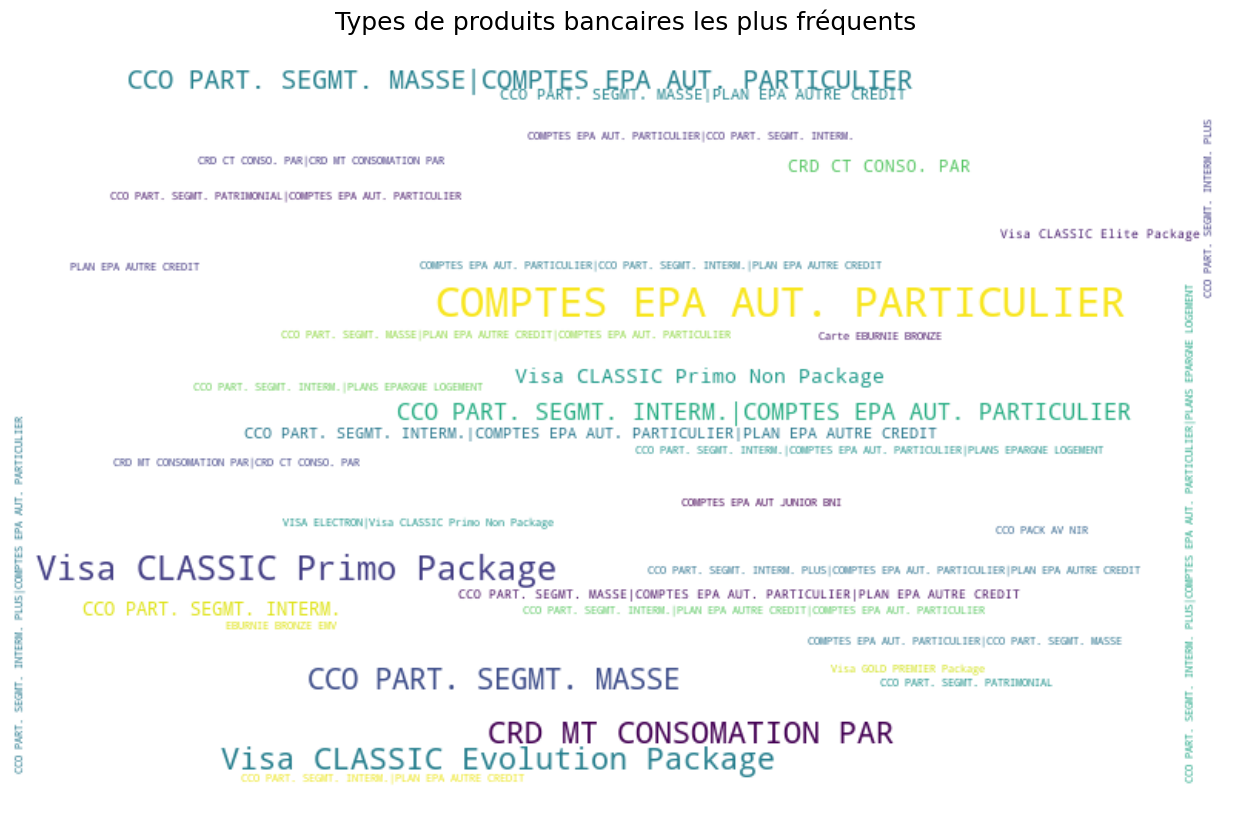

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter



# Fonction pour extraire les types individuels
def extraire_types(colonne):
    types = []
    for val in colonne.dropna():
        types.extend(val.split('__'))
    return types

# Extraire tous les types
types_total = []
for col in ['TYPE_CARTE', 'TYPE_PRET', 'TYPE_PROD_Bnionline', 'TYPE_COMPTE']:
    types_total.extend(extraire_types(data_info_client[col]))

# Compter les fr√©quences
frequences = Counter(types_total)

# G√©n√©rer le nuage de mots
wordcloud = WordCloud(
    min_font_size=7,
    width=800,
    height=500,
    random_state=21,
    max_font_size=50,
    relative_scaling=0.5,
    background_color='white'
).generate_from_frequencies(frequences)

# Afficher le nuage de mots
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Types de produits bancaires les plus fr√©quents", fontsize=18)
plt.show()



In [56]:
#P=clients_segment_nan['TYPE_COMPTE'].unique()
#print(P)

In [57]:
pourcentage_nan = data_info_client.isna().mean() * 100
print(pourcentage_nan)

NUM                              1.628032
CLIENT                           0.000000
DATNAIS                          2.701141
DATE_EER                         0.000000
SEXE                             0.000000
TITUPRINC                        0.000000
IDP                              1.657660
SITUATIONMATRIMONAL              3.278582
CODE_SECTEUR_ACTIVITE            0.000000
SECTEUR_ACTIVITE_PAR_CODEAPE     1.488783
SEGMENT                          0.000000
PROFESSION                      33.932402
CODE_AGENT_ECO                   0.000000
LIBELLE_AGENT_ECO                0.000000
CIVILITE                         0.000000
AGE                              0.000000
ANCIENNETE_JOURS                 0.000000
CARTE                            0.000000
PRET                             0.000000
BNIONLINE                        0.000000
COMPTE                           0.000000
TYPE_CARTE                       0.000000
TYPE_PRET                        0.000000
TYPE_PROD_Bnionline              0

In [55]:
df=data_info_client[['DATNAIS', 'DATE_EER', 'SEXE', 'TITUPRINC', 'SITUATIONMATRIMONAL',
    'SEGMENT', 'PROFESSION', 'CIVILITE', 'AGE', 'ANCIENNETE_JOURS',
    'CARTE', 'PRET', 'BNIONLINE', 'COMPTE', 'VECTEUR_PROD']]

In [56]:
print(df.shape)

(337712, 15)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337712 entries, 0 to 339089
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATNAIS              337712 non-null  object
 1   DATE_EER             337712 non-null  object
 2   SEXE                 337712 non-null  object
 3   TITUPRINC            337712 non-null  object
 4   SITUATIONMATRIMONAL  337712 non-null  object
 5   SEGMENT              337712 non-null  object
 6   PROFESSION           337712 non-null  object
 7   CIVILITE             337712 non-null  object
 8   AGE                  337712 non-null  object
 9   ANCIENNETE_JOURS     337712 non-null  object
 10  CARTE                337712 non-null  object
 11  PRET                 337712 non-null  object
 12  BNIONLINE            337712 non-null  object
 13  COMPTE               337712 non-null  object
 14  VECTEUR_PROD         337712 non-null  object
dtypes: object(15)
memory usage: 41.2+ MB


In [57]:
data_info_client['VECTEUR_PROD'].unique()

array(['CCO PART. SEGMT. MASSE', 'COMPTES EPA AUT. PARTICULIER',
       'VISA ELECTRON PLUS PERSONNEL BNI|EBURNIE BRONZE EMV|CCO PART. SEGMT. PATRIMONIAL|COMPTES EPA AUT. PARTICULIER',
       ..., 'CCO PART. SEGMT. PRESTIGE|PLAN EPA AUTRE CREDIT',
       'PLANS EPARGNE LOGEMENT|CCO PART. SEGMT. PRESTIGE|COMPTES EPA AUT. PARTICULIER',
       'COMPTES EPA AUT. PARTICULIER|CCO PART. SEGMT. DISTINCTION'],
      dtype=object)

In [53]:
data_info_client.head()

NUM                                             CLIENT     DATNAIS  \
0  0.0  3467cefac8c44fadca43c666aabe898ad46a1fb3641d74...         NaN   
1  0.0  6e684dbaef09a3e49fea122d44f52434ed851a6acd59c9...  1953-01-01   
2  0.0  854cdb00fdcedf4fc6e06d489da8ae484bdee3ddc90087...  1956-07-30   
3  0.0  a8c3a3cfde4062d65c2689c53cfce7fbb24ab1ebde81c2...  1953-05-03   
4  0.0  97df78cbf0e27d45d8b753ecc604fc3f2dd654e201222f...  1956-01-01   

     DATE_EER   SEXE TITUPRINC  \
0  1998-03-04  FEMME       OUI   
1  2003-09-03  HOMME       OUI   
2  2003-06-27  FEMME       OUI   
3  2003-09-03  FEMME       OUI   
4  2003-09-08  HOMME       OUI   

                                                 IDP SITUATIONMATRIMONAL  \
0                                                NaN                 NaN   
1  164515614959de9fa3fde7e0ce19c5e0239a2a879bbb92...         CELIBATAIRE   
2  278fc0be61d5639e1f00ac6dde3c387565af98f36a4136...               MARIE   
3  a918171ceae7369ec00ac5d2e1e1436fdaab17f092b989...         CELIBATAIRE   
4  b03ee8c518577ca7621b34d15892cbc03a9c34270db2df...               MARIE   

   CODE_SECTEUR_ACTIVITE                  SECTEUR_ACTIVITE_PAR_CODEAPE  ...  \
0                 9915.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
1                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
2                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
3                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   
4                 9989.0  Agriculture, √©levage, for√™t, chasse et p√™che  ...   

  ANCIENNETE_JOURS CARTE PRET BNIONLINE COMPTE  \
0            10012     0    0         0      1   
1             8003     0    0         0      1   
2             8071     1    0         0      1   
3             8003     1    0         0      1   
4             7998     1    1         0      1   

                                          TYPE_CARTE          TYPE_PRET  \
0                                                                         
1                                                                         
2  VISA ELECTRON PLUS PERSONNEL BNI|EBURNIE BRONZ...                      
3                     Visa CLASSIC Primo Non Package                      
4       VISA ELECTRON|Visa CLASSIC Primo Non Package  CRD CT CONSO. PAR   

   TYPE_PROD_Bnionline                                        TYPE_COMPTE  \
0                                                  CCO PART. SEGMT. MASSE   
1                                            COMPTES EPA AUT. PARTICULIER   
2                       CCO PART. SEGMT. PATRIMONIAL|COMPTES EPA AUT. ...   
3                       CCO PART. SEGMT. INTERM. PLUS|COMPTES EPA AUT....   
4                         CCO PART. SEGMT. INTERM.|PLANS EPARGNE LOGEMENT   

                                        VECTEUR_PROD  
0                             CCO PART. SEGMT. MASSE  
1                       COMPTES EPA AUT. PARTICULIER  
2  VISA ELECTRON PLUS PERSONNEL BNI|EBURNIE BRONZ...  
3  Visa CLASSIC Primo Non Package|CCO PART. SEGMT...  
4  VISA ELECTRON|Visa CLASSIC Primo Non Package|C...  

[5 rows x 26 columns]

In [53]:
# Cr√©e une copie explicite du DataFrame pour √©viter les probl√®mes
df = data_info_client[['SEXE', 'TITUPRINC', 'SITUATIONMATRIMONAL', 'SEGMENT', 'PROFESSION',
                       'CIVILITE', 'AGE', 'ANCIENNETE_JOURS', 'VECTEUR_PROD']].copy()

# Ajoute la colonne 'client_profile' en toute s√©curit√©
df.loc[:, 'client_profile'] = df.apply(
    lambda row: f"{row['SEXE']} {row['TITUPRINC']} {row['SITUATIONMATRIMONAL']} {row['SEGMENT']} {row['PROFESSION']} {row['CIVILITE']} {row['AGE']} {row['ANCIENNETE_JOURS']}",
    axis=1
)


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
client_matrix = tfidf.fit_transform(df['client_profile'])


### Impl√©mentation et √©valuation du mod√®le

In [59]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Nettoyage du texte
def clean_text(text):
    return str(text).lower().strip()

# Construction du profil client
def build_client_profile(row):
    return (
        f"sexe_{clean_text(row['SEXE'])} "
        f"titulaire_{clean_text(row['TITUPRINC'])} "
        f"situation_{clean_text(row['SITUATIONMATRIMONAL'])} "
        f"segment_{clean_text(row['SEGMENT'])} "
        f"profession_{clean_text(row['PROFESSION'])} "
        f"civilite_{clean_text(row['CIVILITE'])} "
        f"age_{row['AGE']} anciennete_{row['ANCIENNETE_JOURS']}"
    )

# Pr√©paration des donn√©es
def prepare_data(data_info_client):
    df = data_info_client[['SEXE', 'TITUPRINC', 'SITUATIONMATRIMONAL', 'SEGMENT', 'PROFESSION',
                           'CIVILITE', 'AGE', 'ANCIENNETE_JOURS', 'VECTEUR_PROD']].copy()
    df['client_profile'] = df.apply(build_client_profile, axis=1)
    return df

# Vectorisation TF-IDF
def vectorize_profiles(df):
    tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
    client_matrix = tfidf.fit_transform(df['client_profile'])
    return tfidf, client_matrix

# Construction des profils produits
def build_product_profiles(df, tfidf, client_matrix):
    product_profiles = {}
    all_products = set(prod.strip() for vect in df['VECTEUR_PROD'] for prod in vect.split('|') if prod.strip())

    for product in all_products:
        indices = [i for i, vect in enumerate(df['VECTEUR_PROD']) if product in vect.split('|')]
        if not indices:
            continue
        product_vector = client_matrix[indices].mean(axis=0)
        product_profiles[product] = np.asarray(product_vector).reshape(1, -1)
    return product_profiles

# Recommandation bas√©e sur le contenu
def recommend_content_based(client_index, df, tfidf, client_matrix, product_profiles, top_n=5):
    client_vector = client_matrix[client_index]
    client_vector = client_vector.reshape(1, -1)
    client_products = set(df.iloc[client_index]['VECTEUR_PROD'].split('|'))

    scores = {}
    for product, vector in product_profiles.items():
        if product in client_products:
            continue
        similarity = cosine_similarity(client_vector, vector).flatten()[0]
        scores[product] = similarity

    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]

    print(f"üßæ Produits d√©j√† poss√©d√©s par le client {client_index} : {list(client_products)}")
    print(f"üìå Recommandations bas√©es sur le contenu pour le client {client_index} :")
    for prod, score in sorted_scores:
        print(f"  - {prod} (similarit√© : {score:.5f})")

    return dict(sorted_scores)

df = data_info_client[['SEXE', 'TITUPRINC', 'SITUATIONMATRIMONAL', 'SEGMENT', 'PROFESSION',
                       'CIVILITE', 'AGE', 'ANCIENNETE_JOURS', 'VECTEUR_PROD']].copy()

df = prepare_data(data_info_client)
tfidf, client_matrix = vectorize_profiles(df)
product_profiles = build_product_profiles(df, tfidf, client_matrix)
recommendations = recommend_content_based(2, df, tfidf, client_matrix, product_profiles)


üßæ Produits d√©j√† poss√©d√©s par le client 2 : ['CCO PART. SEGMT. INTERM. PLUS', 'Visa CLASSIC Primo Non Package', 'COMPTES EPA AUT. PARTICULIER']
üìå Recommandations bas√©es sur le contenu pour le client 2 :
  - Visa CLASSIC Elite Package (similarit√© : 0.36315)
  - COMPTE PART. SEGMT. INTERM. PLUS (similarit√© : 0.34305)
  - PLANS EPARGNE LOGEMENT (similarit√© : 0.28036)
  - Visa CLASSIC Evolution Non Package (similarit√© : 0.25709)
  - COMPTES EPA LOGEMENT (similarit√© : 0.25127)


In [63]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction import text

# üîß Nettoyage avanc√© du texte
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # Supprime la ponctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Supprime caract√®res sp√©ciaux et chiffres
    text = re.sub(r'\s+', ' ', text).strip()  # Supprime les espaces multiples
    return text

# üßπ Stop words fran√ßais personnalis√©s
french_stop_words = list(text.ENGLISH_STOP_WORDS.union([
    'le', 'la', 'les', 'de', 'des', 'du', 'un', 'une', 'et', 'en', '√†', 'au', 'aux', 'pour', 'par', 'avec', 'sur',
    'dans', 'ce', 'cet', 'cette', 'son', 'sa', 'ses', 'leur', 'leurs', 'qui', 'que', 'quoi', 'dont', 'o√π', 'ne', 'pas'
]))


# üßæ Pr√©paration du DataFrame
df = data_info_client[['SEXE', 'TITUPRINC', 'SITUATIONMATRIMONAL', 'SEGMENT', 'PROFESSION',
                       'CIVILITE', 'AGE', 'ANCIENNETE_JOURS', 'VECTEUR_PROD']].copy()

# üîç Construction du profil client textuel
df['client_profile'] = df.apply(
    lambda row: f"{clean_text(row['SEXE'])} {clean_text(row['TITUPRINC'])} {clean_text(row['SITUATIONMATRIMONAL'])} "
                f"{clean_text(row['SEGMENT'])} {clean_text(row['PROFESSION'])} {clean_text(row['CIVILITE'])} "
                f"age_{row['AGE']} anciennete_{row['ANCIENNETE_JOURS']}",
    axis=1
)

# üßº Nettoyage du vecteur produit
df['clean_products'] = df['VECTEUR_PROD'].apply(clean_text)

# üìä Vectorisation TF-IDF des profils clients
tfidf_profile = TfidfVectorizer(stop_words=french_stop_words, ngram_range=(1, 2), max_features=1000)
profile_matrix = tfidf_profile.fit_transform(df['client_profile'])

# üìä Vectorisation TF-IDF des produits poss√©d√©s
tfidf_products = TfidfVectorizer(tokenizer=lambda x: x.split('|'), lowercase=True)
product_matrix = tfidf_products.fit_transform(df['VECTEUR_PROD'])

# ü§ñ Fonction de recommandation hybride
def recommend_products_hybrid(client_index, df, tfidf_profile, profile_matrix, tfidf_products, product_matrix,
                              top_n=5, min_similarity=0.1, alpha=0.5):
    client_profile_text = [df.iloc[client_index]['client_profile']]
    client_profile_vector = tfidf_profile.transform(client_profile_text)

    client_product_text = [df.iloc[client_index]['VECTEUR_PROD']]
    client_product_vector = tfidf_products.transform(client_product_text)

    sim_profile = cosine_similarity(client_profile_vector, profile_matrix).flatten()
    sim_products = cosine_similarity(client_product_vector, product_matrix).flatten()

    sim_scores = alpha * sim_profile + (1 - alpha) * sim_products
    sim_scores = sorted(enumerate(sim_scores), key=lambda x: x[1], reverse=True)

    client_products = set(df.iloc[client_index]['VECTEUR_PROD'].split('|'))

    recommended_products_with_scores = {}
    for idx, score in sim_scores[1:]:
        if score < min_similarity:
            continue

        other_products = set(df.iloc[idx]['VECTEUR_PROD'].split('|'))
        new_products = other_products - client_products
        for prod in new_products:
            prod = prod.strip()
            if prod and prod not in recommended_products_with_scores:
                recommended_products_with_scores[prod] = score
        if len(recommended_products_with_scores) >= top_n:
            break

    print(f"üßæ Produits d√©j√† poss√©d√©s par le client {client_index} : {list(client_products)}")
    print(f"üìå Recommandations hybrides pour le client {client_index} :")
    for prod, score in recommended_products_with_scores.items():
        print(f"  - {prod} (score hybride : {score:.5f})")

    return recommended_products_with_scores

# üß™ Exemple d'utilisation
recommendations = recommend_products_hybrid(
    client_index=2,
    df=df,
    tfidf_profile=tfidf_profile,
    profile_matrix=profile_matrix,
    tfidf_products=tfidf_products,
    product_matrix=product_matrix,
    top_n=5,
    min_similarity=0.1,
    alpha=0.5
)


C:\Users\gerard.kra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


üßæ Produits d√©j√† poss√©d√©s par le client 2 : ['CCO PART. SEGMT. INTERM. PLUS', 'Visa CLASSIC Primo Non Package', 'COMPTES EPA AUT. PARTICULIER']
üìå Recommandations hybrides pour le client 2 :
  - PLAN EPA AUTRE CREDIT (score hybride : 0.82812)
  - CRD MT CONSOMATION PAR (score hybride : 0.79502)
  - PLANS EPARGNE LOGEMENT (score hybride : 0.78460)
  - Visa CLASSIC Elite Package (score hybride : 0.74061)
  - CRD CT CONSO. PAR (score hybride : 0.68766)


In [73]:
import pandas as pd
import re
import string
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

df = data_info_client[['SEXE', 'TITUPRINC', 'SITUATIONMATRIMONAL', 'SEGMENT', 'PROFESSION',
                       'CIVILITE', 'AGE', 'ANCIENNETE_JOURS', 'VECTEUR_PROD']].copy()
df = data_clients.sample(n=1000, random_state=42)


# Nettoyage avanc√© du texte
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # Supprime la ponctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Supprime caract√®res sp√©ciaux et chiffres
    text = re.sub(r'\s+', ' ', text).strip()  # Supprime les espaces multiples
    return text

# Construction du profil client textuel
df = data_info_client.copy()
df['client_profile'] = df.apply(
    lambda row: f"{clean_text(row['SEXE'])} {clean_text(row['TITUPRINC'])} {clean_text(row['SITUATIONMATRIMONAL'])} "
                f"{clean_text(row['SEGMENT'])} {clean_text(row['PROFESSION'])} {clean_text(row['CIVILITE'])} "
                f"age_{row['AGE']} anciennete_{row['ANCIENNETE_JOURS']}",
    axis=1
)

# Nettoyage des produits
df['clean_products'] = df['VECTEUR_PROD'].apply(lambda x: [clean_text(p) for p in x.split('|')])

# Pr√©paration des corpus pour Word2Vec
profile_corpus = [row.split() for row in df['client_profile']]
product_corpus = df['clean_products'].tolist()

# Entra√Ænement des mod√®les Word2Vec
profile_w2v = Word2Vec(sentences=profile_corpus, vector_size=100, window=5, min_count=1, workers=1)
product_w2v = Word2Vec(sentences=product_corpus, vector_size=100, window=5, min_count=1, workers=1)

# Fonction pour obtenir la moyenne des vecteurs Word2Vec
def get_mean_vector(model, words):
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Calcul des matrices de vecteurs moyens
profile_vectors = np.array([get_mean_vector(profile_w2v, words) for words in profile_corpus])
product_vectors = np.array([get_mean_vector(product_w2v, words) for words in product_corpus])

# Fonction de recommandation hybride avec Word2Vec
def recommend_products_w2v(client_index, df, profile_vectors, product_vectors, top_n=5, min_similarity=0.1, alpha=0.5):
    client_profile_vector = profile_vectors[client_index].reshape(1, -1)
    client_product_vector = product_vectors[client_index].reshape(1, -1)

    sim_profile = cosine_similarity(client_profile_vector, profile_vectors).flatten()
    sim_products = cosine_similarity(client_product_vector, product_vectors).flatten()

    sim_scores = alpha * sim_profile + (1 - alpha) * sim_products
    sim_scores = sorted(enumerate(sim_scores), key=lambda x: x[1], reverse=True)

    client_products = set(df.iloc[client_index]['clean_products'])

    recommended_products_with_scores = {}
    for idx, score in sim_scores[1:]:
        if score < min_similarity:
            continue

        other_products = set(df.iloc[idx]['clean_products'])
        new_products = other_products - client_products
        for prod in new_products:
            if prod and prod not in recommended_products_with_scores:
                recommended_products_with_scores[prod] = score
        if len(recommended_products_with_scores) >= top_n:
            break

    print(f"üßæ Produits d√©j√† poss√©d√©s par le client {client_index} : {list(client_products)}")
    print(f"üìå Recommandations Word2Vec pour le client {client_index} :")
    for prod, score in recommended_products_with_scores.items():
        print(f"  - {prod} (score hybride : {score:.5f})")

    return recommended_products_with_scores

# Exemple d'utilisation
recommendations = recommend_products_w2v(
    client_index=2,
    df=df,
    profile_vectors=profile_vectors,
    product_vectors=product_vectors,
    top_n=5,
    min_similarity=0.1,
    alpha=0.5
)


üßæ Produits d√©j√† poss√©d√©s par le client 2 : ['comptes epa aut particulier', 'visa classic primo non package', 'cco part segmt interm plus']
üìå Recommandations Word2Vec pour le client 2 :
  - visa classic elite package (score hybride : 0.96647)
  - plan epa autre credit (score hybride : 0.95297)
  - crd ct conso par (score hybride : 0.94255)
  - eburnie bronze emv (score hybride : 0.94207)
  - crd mt consomation par (score hybride : 0.92717)
  - plans epargne logement (score hybride : 0.92717)


In [74]:
data_info_client.to_csv("data_info_client_clean.csv", index=False, encoding='utf-8-sig')


### Mod√®le TF-IDF

## Impl√©mentation


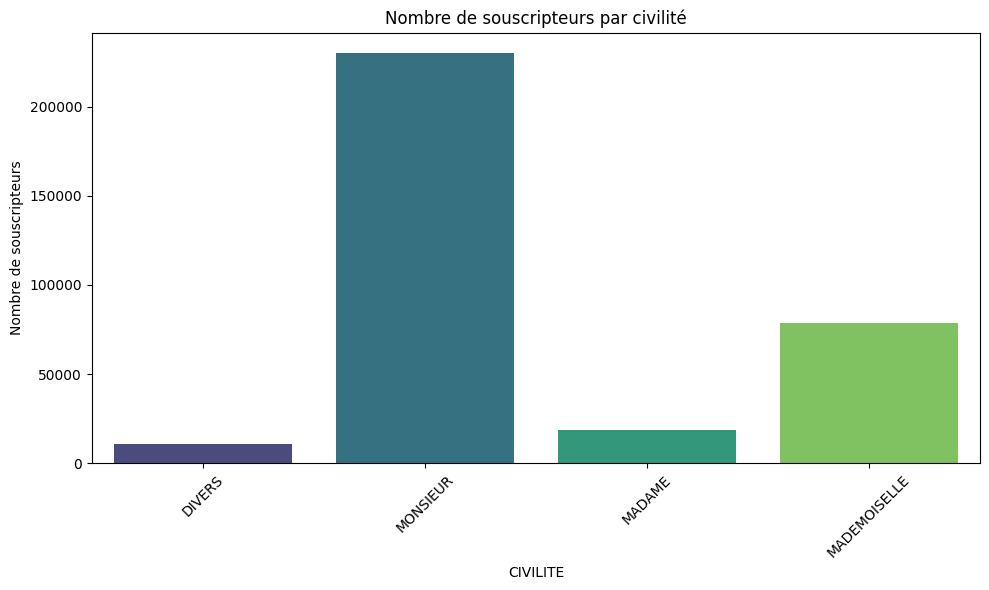

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que df est d√©j√† d√©fini
plt.figure(figsize=(10, 6))

# Utilisation de 'hue' pour appliquer la palette correctement
sns.countplot(data=data_clients, x='CIVILITE', hue='CIVILITE', palette='viridis', dodge=False, legend=False)

plt.title("Nombre de souscripteurs par civilit√©")
plt.ylabel("Nombre de souscripteurs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [64]:
#data_info_client['CIVILITE'].unique()

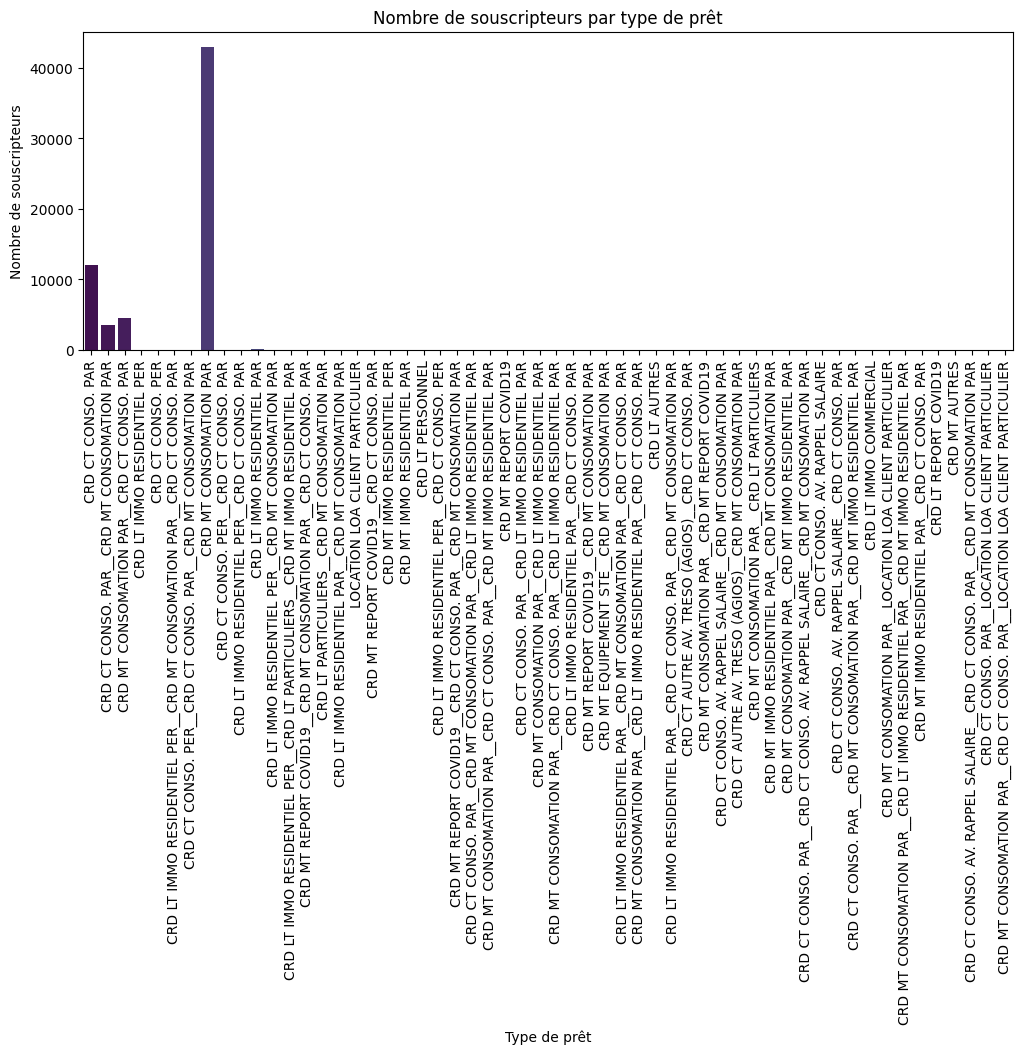

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les valeurs connues
filtered_df = data_clients[data_clients['TYPE_PRET'] != np.nan]

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='TYPE_PRET', hue='TYPE_PRET', palette='viridis', legend=False, dodge=False)

plt.title("Nombre de souscripteurs par type de pr√™t")
plt.xlabel("Type de pr√™t")
plt.ylabel("Nombre de souscripteurs")
plt.xticks(rotation='vertical')  # Affichage vertical des √©tiquettes

# Ajustement manuel des marges pour √©viter l'avertissement tight_layout
plt.subplots_adjust(bottom=0.35, top=0.88)
plt.show()


In [ ]:
# 3. Nombre de souscripteurs par √¢ge
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import pandas as pd
import numpy as np

# Trac√© de l'histogramme
plt.figure(figsize=(10, 6))
sns.histplot(data=data_clients, x='AGE', bins=30, kde=True, color=cm.viridis(0.6))
plt.title("Distribution des souscripteurs par √¢ge")
plt.xlabel("√Çge")
plt.ylabel("Nombre de souscripteurs")
plt.tight_layout()
#plt.show()
plt.savefig("distribution.png")



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import pandas as pd
import numpy as np

data_clients=data_clients.copy()
# Conversion de l'anciennet√© en ann√©es
data_clients['ANCIENNETE_ANNEES'] = data_clients['ANCIENNETE_JOURS'] / 365

# Trac√© de l'histogramme
plt.figure(figsize=(10, 6))
sns.histplot(data=data_clients, x='ANCIENNETE_ANNEES', bins=30, kde=True, color=cm.viridis(0.6))
plt.title("Distribution des souscripteurs par anciennet√© (en ann√©es)")
plt.xlabel("Anciennet√© (ann√©es)")
plt.ylabel("Nombre de souscripteurs")
plt.tight_layout()
#plt.show()
plt.savefig("ancienete.png")



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

data_info_client = data_info_client.copy()
data_info_client['GROUPE_AGE'] = pd.cut(data_info_client['AGE'], bins=bins, labels=labels, right=False)


# D√©finir les intervalles d'√¢ge et les √©tiquettes

# Tracer le graphique avec hue pour appliquer la palette correctement
plt.figure(figsize=(10, 6))
sns.countplot(data=data_info_client, x='GROUPE_AGE', hue='GROUPE_AGE', palette='viridis', legend=False, dodge=False)

plt.title("Nombre de souscripteurs par groupe d'√¢ge")
plt.xlabel("Groupe d'√¢ge")
plt.ylabel("Nombre de souscripteurs")
plt.tight_layout()
#plt.show()
plt.savefig("souscripteur_tranche_age.png")


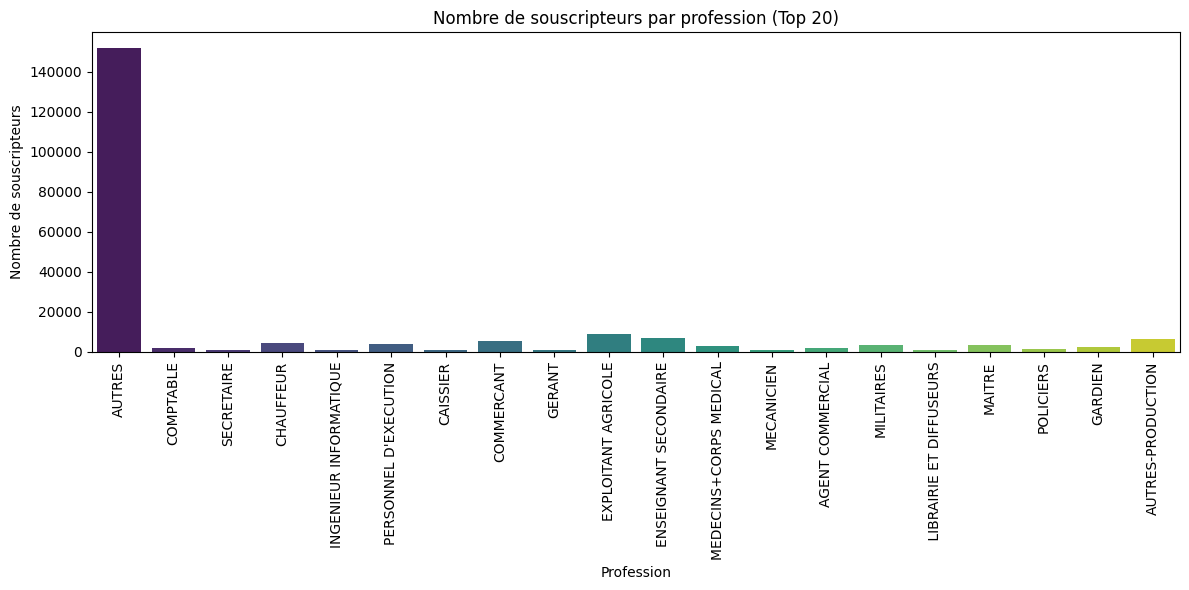

In [57]:
# 5. Nombre de souscripteurs par profession
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les 20 professions les plus fr√©quentes
top_prof = data_clients['PROFESSION'].value_counts().nlargest(20).index
filtered_df = data_clients[data_clients['PROFESSION'].isin(top_prof)]

# Tracer le graphique avec hue pour appliquer la palette correctement
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='PROFESSION', hue='PROFESSION', palette='viridis', legend=False, dodge=False)

plt.title("Nombre de souscripteurs par profession (Top 20)")
plt.xlabel("Profession")
plt.ylabel("Nombre de souscripteurs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [59]:
data_clients['PROFESSION'].unique()

array([nan, 'EMPLOYE DE BANQUE', 'SECRETAIRE DE DIRECTION', 'AUTRES',
       'COMPTABLE', 'SECRETAIRE', 'CADRE MOYEN ET SUPERIEUR',
       'INSPECTION', 'TRESORIER', 'RESP. JURIDIQUE ET FISCAL',
       'CHAUFFEUR', 'CADRE FINANCIER', 'INGENIEUR INFORMATIQUE',
       "PERSONNEL D'EXECUTION", 'CADRE COMPTABLE', 'DIRECTEUR',
       'DIRECTEUR GENERAL', 'P.D.G.', 'RESPONSABLE MEDIA',
       'ATTACHE DE DIRECTION', "CHARGE D'AFFAIRES", 'CADRE ADMINISTRATIF',
       'CAISSIER', 'DIRECTEUR INFORMATIQUE', "CADRE D'AGENCE",
       'DIR. DES RESSOURCES HUMAINES', 'DIR ADMINISTRATIF & FINANCIER',
       'COMMERCANT', 'GERANT', 'ADMINISTRATEUR CIVIL',
       'EXPLOITANT AGRICOLE', 'ENSEIGNANT SECONDAIRE', 'ENTREPRENEUR',
       'PHARMACIENS', 'TRANSPORT:AERIEN,MARITIME...',
       'MEDECINS+CORPS MEDICAL', 'DEPUTE', 'MECANICIEN', 'COUTURE',
       'CONTROLEUR FINANCIER', 'JOURNALISTE', 'NOTAIRE',
       'AGENT COMMERCIAL', 'INGENIEURS', 'INGENIEUR AGRO ALIMENTAIRE',
       'ENSEIGNANT SUPERIEUR', 

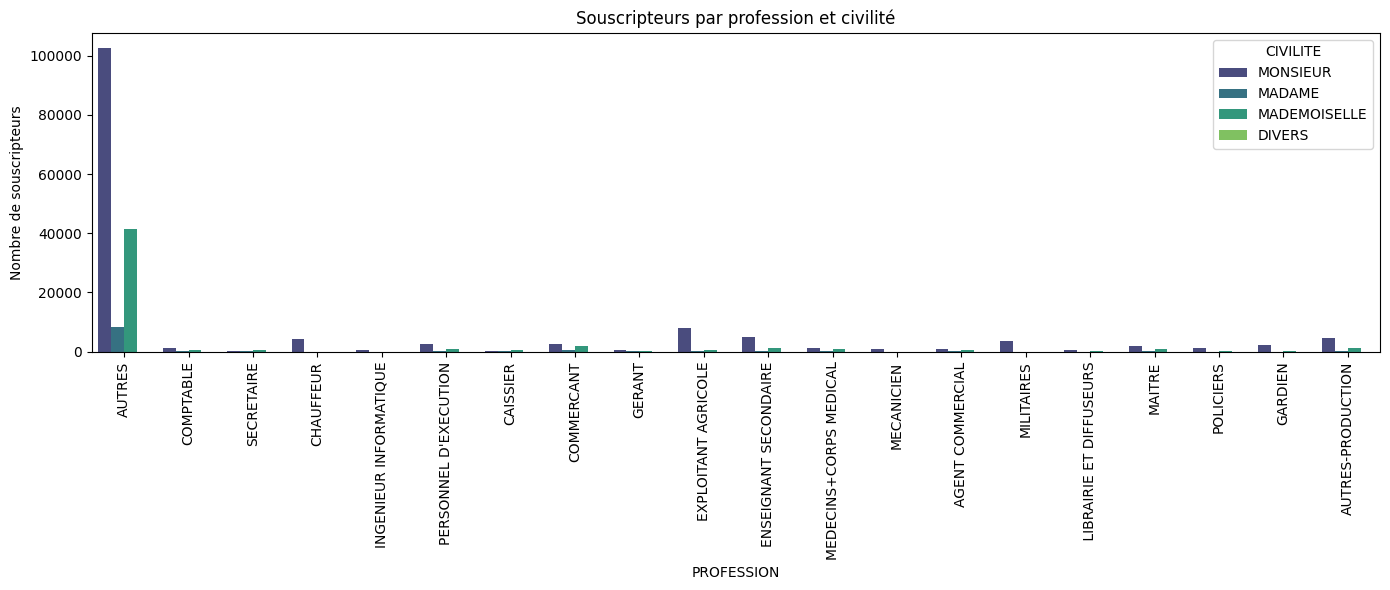

In [60]:
# 6. Nombre de souscripteurs par profession et civilit√©
plt.figure(figsize=(14, 6))
sns.countplot(data=data_clients[data_clients['PROFESSION'].isin(top_prof)], x='PROFESSION', hue='CIVILITE', palette='viridis')
plt.title("Souscripteurs par profession et civilit√©")
#plt.xlabel("PROFESSION")
plt.ylabel("Nombre de souscripteurs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

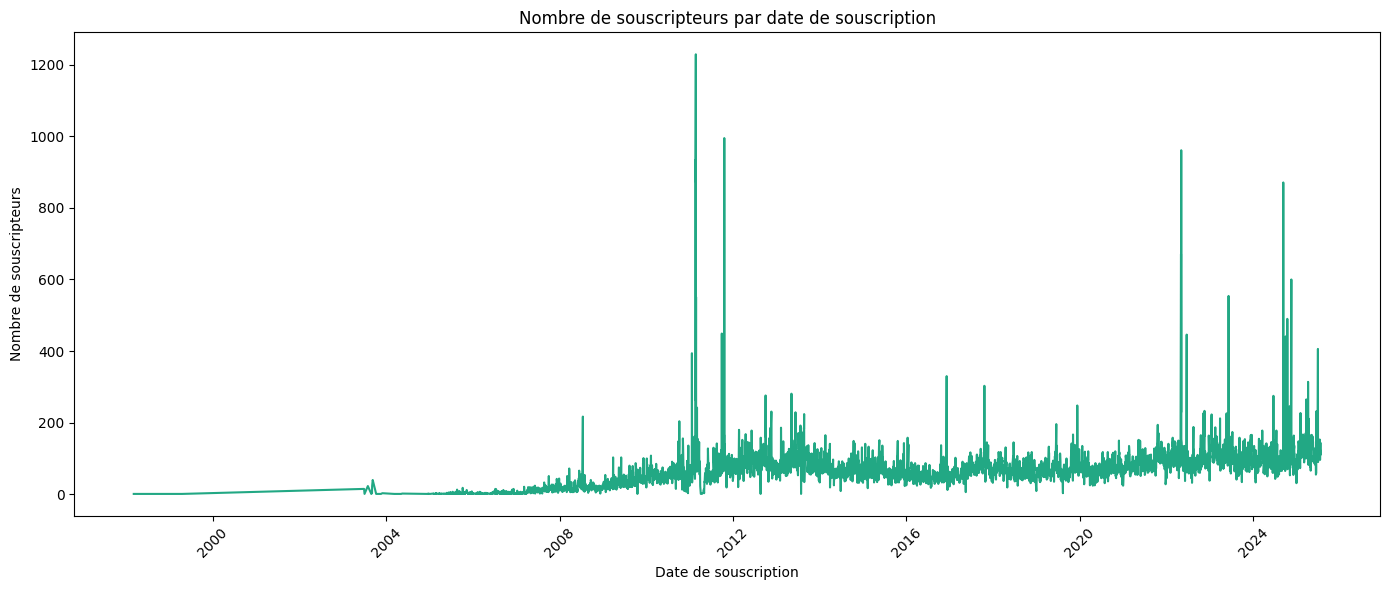

In [62]:
# 7. Nombre de souscripteurs par DATE_EER

from matplotlib import cm
data_clients = data_clients.copy()
data_clients['DATE_EER'] = pd.to_datetime(data_clients['DATE_EER'], errors='coerce')
data_clients['DATE_EER_JOUR'] = data_clients['DATE_EER'].dt.date
plt.figure(figsize=(14, 6))
date_counts = data_clients['DATE_EER_JOUR'].value_counts().sort_index()
sns.lineplot(x=date_counts.index, y=date_counts.values, color=cm.viridis(0.6))
plt.title("Nombre de souscripteurs par date de souscription")
plt.xlabel("Date de souscription")
plt.ylabel("Nombre de souscripteurs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()